# QLP-TGLC Light Curve Analysis Tutorial

This notebook demonstrates how to read and plot QLP-TGLC (Quick Look Pipeline) light curve data from FITS files.

QLP light curves are produced by the TESS Quick Look Pipeline and contain both Simple Aperture Photometry (SAP) and Detrended (DET) flux measurements.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [2]:
# Load the QLP light curve file
qlp_file = '/Users/tehan/Downloads/hlsp_qlp_tess_ffi_s0095-0000000149349867_tess_v01_llc.fits'

# Open the FITS file
hdul = fits.open(qlp_file)

# Display file structure
print("FITS file structure:")
hdul.info()
print("\n" + "="*50)

# Display column information
print("\nColumn names and descriptions:")
for i, col in enumerate(hdul[1].columns):
    print(f"{i+1:2d}. {col.name:15s} - {col.format:10s}")


FITS file structure:
Filename: /Users/tehan/Downloads/hlsp_qlp_tess_ffi_s0095-0000000149349867_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  LIGHTCURVE    1 BinTableHDU     71   10626R x 14C   [D, J, E, E, E, J, J, E, E, E, E, E, E, E]   


Column names and descriptions:
 1. TIME            - D         
 2. CADENCENO       - J         
 3. SAP_FLUX        - E         
 4. DET_FLUX        - E         
 5. DET_FLUX_ERR    - E         
 6. QUALITY         - J         
 7. ORBITID         - J         
 8. SAP_X           - E         
 9. SAP_Y           - E         
10. SAP_BKG         - E         
11. SAP_BKG_ERR     - E         
12. DET_FLUX_SML    - E         
13. DET_FLUX_LAG    - E         
14. SYS_RM_FLUX     - E         


In [3]:
# Extract data from the light curve table
data = hdul[1].data

# Extract time and flux data
time = data['TIME']  # Time in TBJD (TESS Barycentric Julian Date)
cadenceno = data['CADENCENO']  # Cadence number
sap_flux = data['SAP_FLUX']  # Simple Aperture Photometry flux
det_flux = data['DET_FLUX']  # Detrended flux
det_flux_err = data['DET_FLUX_ERR']  # Detrended flux error
quality = data['QUALITY']  # Quality flags
orbitid = data['ORBITID']  # Orbit ID

# Additional data
sap_x = data['SAP_X']  # X position
sap_y = data['SAP_Y']  # Y position
sap_bkg = data['SAP_BKG']  # Background flux
sap_bkg_err = data['SAP_BKG_ERR']  # Background flux error

print(f"Total number of data points: {len(time)}")
print(f"Time range: {time[0]:.2f} to {time[-1]:.2f} TBJD")
print(f"Duration: {time[-1] - time[0]:.2f} days")
print(f"Number of orbits: {len(np.unique(orbitid))}")

# Check for valid data points
valid_sap = ~np.isnan(sap_flux)
valid_det = ~np.isnan(det_flux)
print(f"Valid SAP flux points: {np.sum(valid_sap)}")
print(f"Valid DET flux points: {np.sum(valid_det)}")


Total number of data points: 10626
Time range: 3882.33 to 3907.56 TBJD
Duration: 25.23 days
Number of orbits: 2
Valid SAP flux points: 10626
Valid DET flux points: 10626


In [4]:
# Filter out bad quality data points
# Quality flags: 0 = good data, non-zero = various quality issues
good_quality = (quality == 0)

# Combine quality filter with valid data filter
good_sap = good_quality & valid_sap
good_det = good_quality & valid_det

print(f"Good quality SAP flux points: {np.sum(good_sap)}")
print(f"Good quality DET flux points: {np.sum(good_det)}")

# Extract good quality data
time_good_sap = time[good_sap]
sap_flux_good = sap_flux[good_sap]

time_good_det = time[good_det]
det_flux_good = det_flux[good_det]
det_flux_err_good = det_flux_err[good_det]

print(f"Data retention rate (SAP): {np.sum(good_sap)/len(time)*100:.1f}%")
print(f"Data retention rate (DET): {np.sum(good_det)/len(time)*100:.1f}%")


Good quality SAP flux points: 7606
Good quality DET flux points: 7606
Data retention rate (SAP): 71.6%
Data retention rate (DET): 71.6%


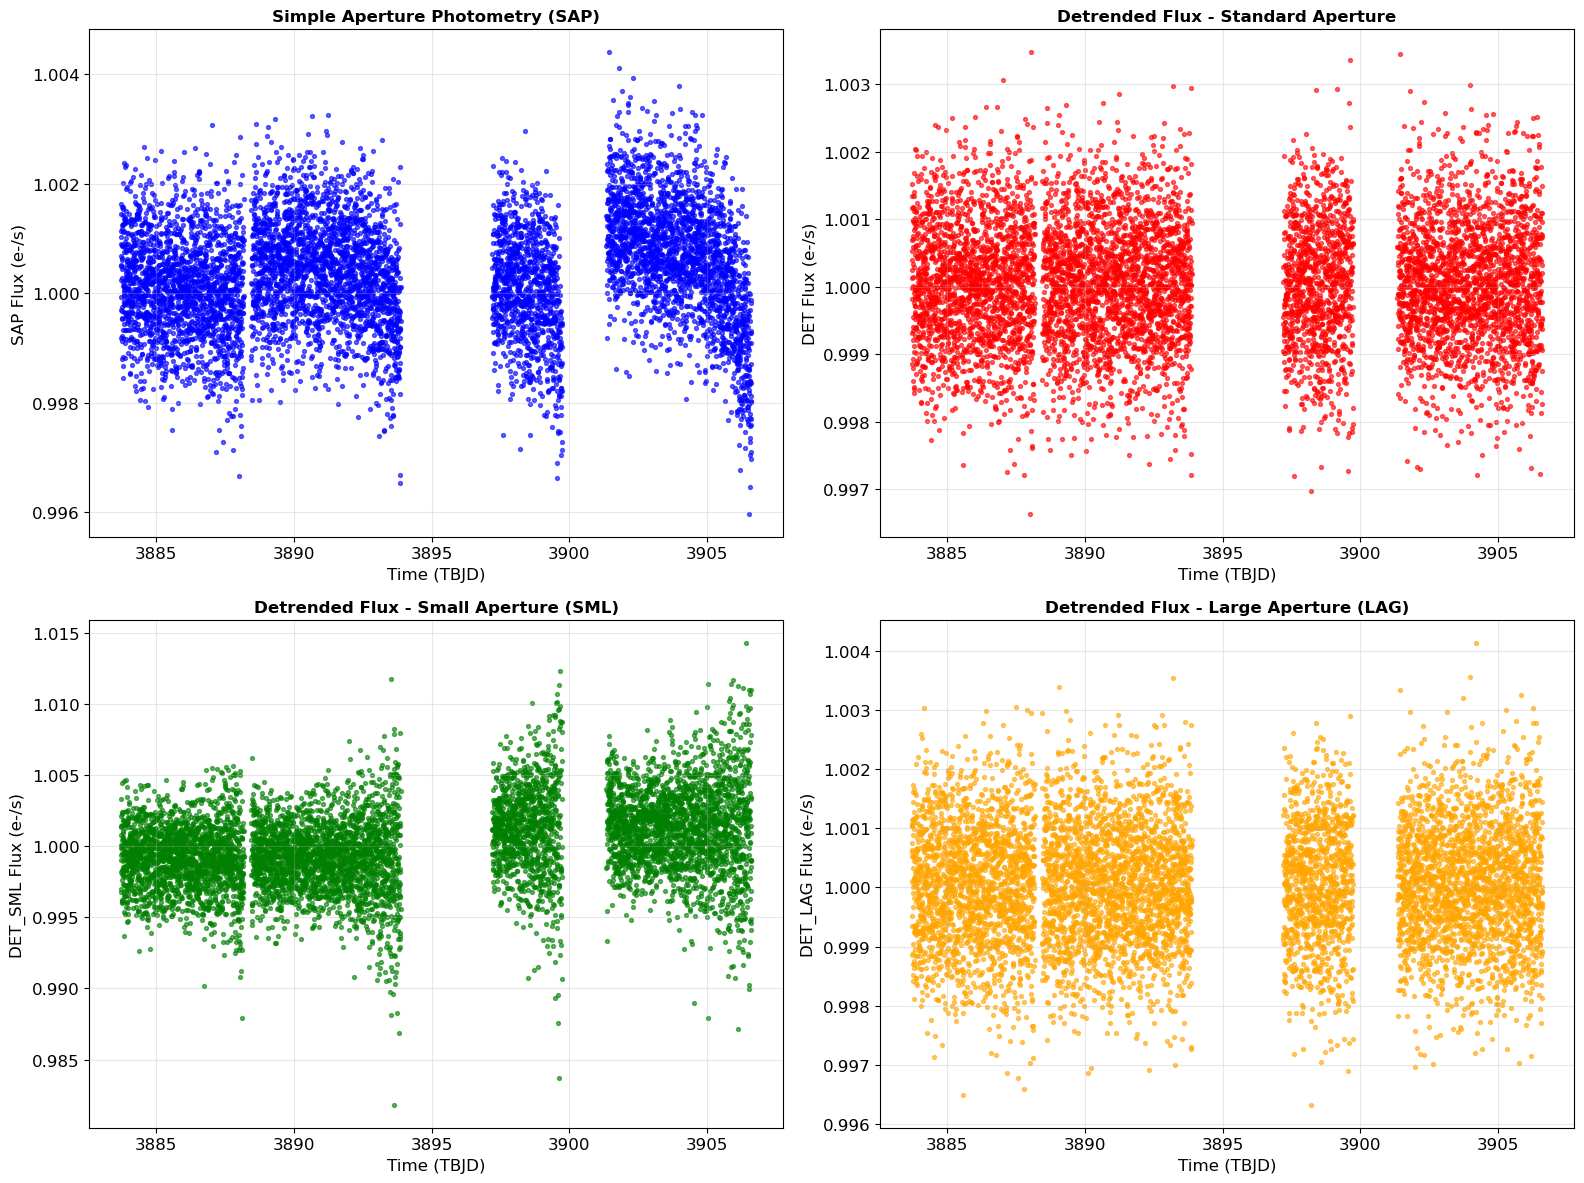

SAP flux statistics:
  Mean: 1.00 e-/s
  Std:  0.00 e-/s
  Min:  1.00 e-/s
  Max:  1.00 e-/s

DET flux statistics:
  Standard - Mean: 1.00 e-/s, Std: 0.00 e-/s
  Small    - Mean: 1.00 e-/s, Std: 0.00 e-/s
  Large    - Mean: 1.00 e-/s, Std: 0.00 e-/s


In [5]:
# Extract additional aperture data
det_flux_sml = data['DET_FLUX_SML']  # Small aperture detrended flux
det_flux_lag = data['DET_FLUX_LAG']  # Large aperture detrended flux

# Filter for good quality data
good_sml = good_quality & ~np.isnan(det_flux_sml)
good_lag = good_quality & ~np.isnan(det_flux_lag)

time_good_sml = time[good_sml]
det_flux_sml_good = det_flux_sml[good_sml]

time_good_lag = time[good_lag]
det_flux_lag_good = det_flux_lag[good_lag]

# Plot the raw light curves with separate panels for each aperture
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot SAP flux
ax1.scatter(time_good_sap, sap_flux_good, c='blue', alpha=0.6, s=8)
ax1.set_title('Simple Aperture Photometry (SAP)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Time (TBJD)')
ax1.set_ylabel('SAP Flux (e-/s)')
ax1.grid(True, alpha=0.3)

# Plot DET flux (standard aperture)
ax2.scatter(time_good_det, det_flux_good, c='red', alpha=0.6, s=8)
ax2.set_title('Detrended Flux - Standard Aperture', fontsize=12, fontweight='bold')
ax2.set_xlabel('Time (TBJD)')
ax2.set_ylabel('DET Flux (e-/s)')
ax2.grid(True, alpha=0.3)

# Plot DET flux (small aperture)
ax3.scatter(time_good_sml, det_flux_sml_good, c='green', alpha=0.6, s=8)
ax3.set_title('Detrended Flux - Small Aperture (SML)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Time (TBJD)')
ax3.set_ylabel('DET_SML Flux (e-/s)')
ax3.grid(True, alpha=0.3)

# Plot DET flux (large aperture)
ax4.scatter(time_good_lag, det_flux_lag_good, c='orange', alpha=0.6, s=8)
ax4.set_title('Detrended Flux - Large Aperture (LAG)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Time (TBJD)')
ax4.set_ylabel('DET_LAG Flux (e-/s)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"SAP flux statistics:")
print(f"  Mean: {np.nanmean(sap_flux_good):.2f} e-/s")
print(f"  Std:  {np.nanstd(sap_flux_good):.2f} e-/s")
print(f"  Min:  {np.nanmin(sap_flux_good):.2f} e-/s")
print(f"  Max:  {np.nanmax(sap_flux_good):.2f} e-/s")

print(f"\nDET flux statistics:")
print(f"  Standard - Mean: {np.nanmean(det_flux_good):.2f} e-/s, Std: {np.nanstd(det_flux_good):.2f} e-/s")
print(f"  Small    - Mean: {np.nanmean(det_flux_sml_good):.2f} e-/s, Std: {np.nanstd(det_flux_sml_good):.2f} e-/s")
print(f"  Large    - Mean: {np.nanmean(det_flux_lag_good):.2f} e-/s, Std: {np.nanstd(det_flux_lag_good):.2f} e-/s")


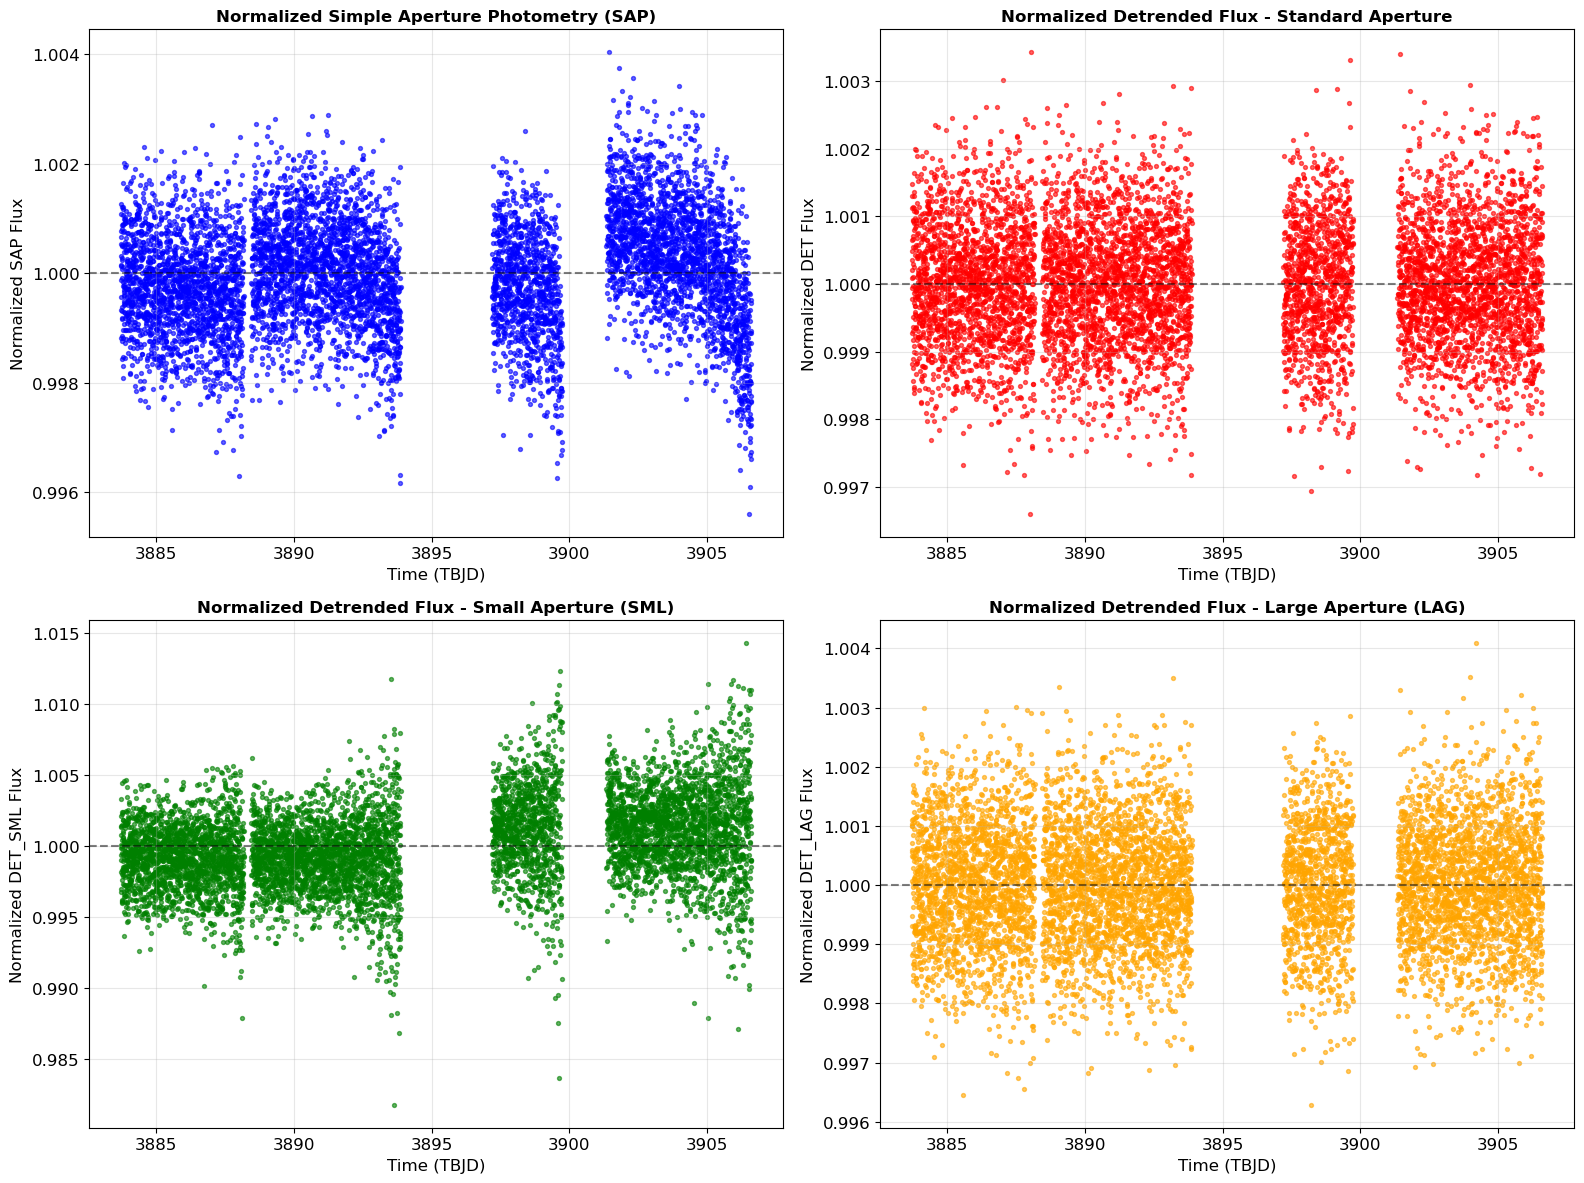

Photometric precision (RMS in ppt):
  SAP:           1.01 ppt
  DET (standard): 0.89 ppt
  DET_SML:       2.94 ppt
  DET_LAG:       1.01 ppt

Improvement factors (relative to SAP):
  DET (standard): 1.14x
  DET_SML:       0.34x
  DET_LAG:       1.00x


In [ ]:
# Normalize the light curves for better comparison
# Normalize SAP flux
sap_flux_norm = sap_flux_good / np.nanmedian(sap_flux_good)

# Normalize DET flux (all aperture sizes)
det_flux_norm = det_flux_good / np.nanmedian(det_flux_good)
det_flux_sml_norm = det_flux_sml_good / np.nanmedian(det_flux_sml_good)
det_flux_lag_norm = det_flux_lag_good / np.nanmedian(det_flux_lag_good)

# Plot normalized light curves with separate panels for each aperture
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot normalized SAP flux
ax1.scatter(time_good_sap, sap_flux_norm, c='blue', alpha=0.6, s=8)
ax1.set_title('Normalized Simple Aperture Photometry (SAP)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Time (TBJD)')
ax1.set_ylabel('Normalized SAP Flux')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=1.0, color='k', linestyle='--', alpha=0.5)

# Plot normalized DET flux (standard aperture)
ax2.scatter(time_good_det, det_flux_norm, c='red', alpha=0.6, s=8)
ax2.set_title('Normalized Detrended Flux - Standard Aperture', fontsize=12, fontweight='bold')
ax2.set_xlabel('Time (TBJD)')
ax2.set_ylabel('Normalized DET Flux')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=1.0, color='k', linestyle='--', alpha=0.5)

# Plot normalized DET flux (small aperture)
ax3.scatter(time_good_sml, det_flux_sml_norm, c='green', alpha=0.6, s=8)
ax3.set_title('Normalized Detrended Flux - Small Aperture (SML)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Time (TBJD)')
ax3.set_ylabel('Normalized DET_SML Flux')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=1.0, color='k', linestyle='--', alpha=0.5)

# Plot normalized DET flux (large aperture)
ax4.scatter(time_good_lag, det_flux_lag_norm, c='orange', alpha=0.6, s=8)
ax4.set_title('Normalized Detrended Flux - Large Aperture (LAG)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Time (TBJD)')
ax4.set_ylabel('Normalized DET_LAG Flux')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=1.0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and display photometric precision
sap_rms = np.nanstd(sap_flux_norm) * 1000  # in parts per thousand (ppt)
det_rms = np.nanstd(det_flux_norm) * 1000  # in parts per thousand (ppt)
det_sml_rms = np.nanstd(det_flux_sml_norm) * 1000  # in parts per thousand (ppt)
det_lag_rms = np.nanstd(det_flux_lag_norm) * 1000  # in parts per thousand (ppt)

print(f"Photometric precision (RMS in ppt):")
print(f"  SAP:           {sap_rms:.2f} ppt")
print(f"  DET (standard): {det_rms:.2f} ppt")
print(f"  DET_SML:       {det_sml_rms:.2f} ppt")
print(f"  DET_LAG:       {det_lag_rms:.2f} ppt")
print(f"\nImprovement factors (relative to SAP):")
print(f"  DET (standard): {sap_rms/det_rms:.2f}x")
print(f"  DET_SML:       {sap_rms/det_sml_rms:.2f}x")
print(f"  DET_LAG:       {sap_rms/det_lag_rms:.2f}x")


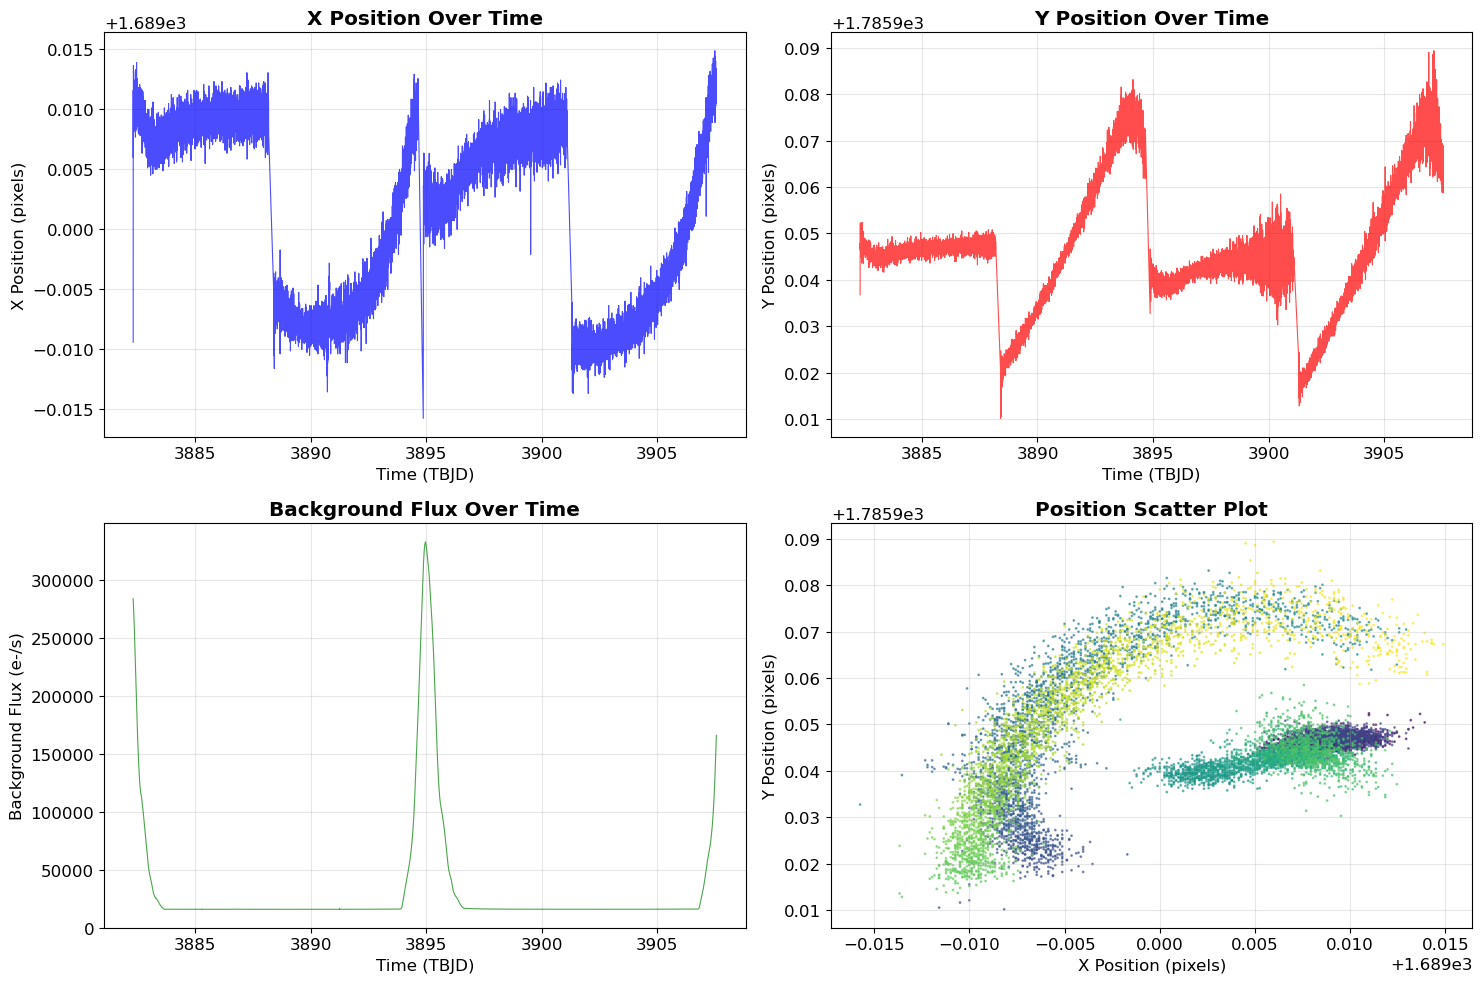

Position statistics:
  X position: 1689.00 ± 0.01 pixels
  Y position: 1785.95 ± 0.01 pixels
  Total drift: 0.02 pixels


In [7]:
# Plot position and background information
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# X position over time
ax1.plot(time, sap_x, 'b-', alpha=0.7, linewidth=0.8)
ax1.set_title('X Position Over Time', fontweight='bold')
ax1.set_xlabel('Time (TBJD)')
ax1.set_ylabel('X Position (pixels)')
ax1.grid(True, alpha=0.3)

# Y position over time
ax2.plot(time, sap_y, 'r-', alpha=0.7, linewidth=0.8)
ax2.set_title('Y Position Over Time', fontweight='bold')
ax2.set_xlabel('Time (TBJD)')
ax2.set_ylabel('Y Position (pixels)')
ax2.grid(True, alpha=0.3)

# Background flux over time
ax3.plot(time, sap_bkg, 'g-', alpha=0.7, linewidth=0.8)
ax3.set_title('Background Flux Over Time', fontweight='bold')
ax3.set_xlabel('Time (TBJD)')
ax3.set_ylabel('Background Flux (e-/s)')
ax3.grid(True, alpha=0.3)

# Position scatter plot
ax4.scatter(sap_x, sap_y, c=time, cmap='viridis', alpha=0.6, s=1)
ax4.set_title('Position Scatter Plot', fontweight='bold')
ax4.set_xlabel('X Position (pixels)')
ax4.set_ylabel('Y Position (pixels)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print position statistics
print(f"Position statistics:")
print(f"  X position: {np.nanmean(sap_x):.2f} ± {np.nanstd(sap_x):.2f} pixels")
print(f"  Y position: {np.nanmean(sap_y):.2f} ± {np.nanstd(sap_y):.2f} pixels")
print(f"  Total drift: {np.sqrt(np.nanvar(sap_x) + np.nanvar(sap_y)):.2f} pixels")


# Additional CSV Light Curve Analysis

This section loads and analyzes a CSV light curve file that contains both raw and detrended magnitude and flux data.


In [ ]:
# Load CSV light curve data
import pandas as pd

csv_file = '/Users/tehan/Downloads/0000000149349867.csv'
df = pd.read_csv(csv_file)

# Display basic information about the dataset
print("CSV Light Curve Dataset Information:")
print(f"Total data points: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nBasic statistics:")
print(df.describe())


CSV Light Curve Dataset Information:
Total data points: 10626
Columns: ['cadence', 'bjd', 'raw_mag', 'detrended_mag', 'raw_flux_ppm', 'detrended_flux_ppm', 'quality_flags']

First few rows:
   cadence          bjd    raw_mag  detrended_mag   raw_flux_ppm  \
0  1146903  3882.327881  11.157269      11.157084 -502156.202511   
1  1146904  3882.330322  10.417503      10.400050  -15990.781302   
2  1146905  3882.332520  10.413853      10.400627  -12676.994346   
3  1146906  3882.334717  10.419985      10.396086  -18237.467609   
4  1146907  3882.337158  10.414445      10.403454  -13214.992228   

   detrended_flux_ppm  quality_flags  
0      -502078.917012              3  
1          -59.006523              3  
2         -590.498117              3  
3         3598.540192              3  
4        -3189.738827              3  

Data types:
cadence                 int64
bjd                   float64
raw_mag               float64
detrended_mag         float64
raw_flux_ppm          float64
detr

In [ ]:
# Extract data from CSV
cadence = df['cadence'].values
bjd = df['bjd'].values
raw_mag = df['raw_mag'].values
detrended_mag = df['detrended_mag'].values
raw_flux_ppm = df['raw_flux_ppm'].values
detrended_flux_ppm = df['detrended_flux_ppm'].values
quality_flags = df['quality_flags'].values

# Filter for good quality data (assuming 0 = good quality)
good_quality_csv = (quality_flags == 0)

print(f"Quality flag analysis:")
unique_flags, counts = np.unique(quality_flags, return_counts=True)
for flag, count in zip(unique_flags, counts):
    percentage = count / len(quality_flags) * 100
    print(f"  Flag {flag:10d}: {count:6d} points ({percentage:5.1f}%)")

print(f"\nGood quality data: {np.sum(good_quality_csv)} points ({np.sum(good_quality_csv)/len(quality_flags)*100:.1f}%)")

# Extract good quality data
bjd_good = bjd[good_quality_csv]
raw_mag_good = raw_mag[good_quality_csv]
detrended_mag_good = detrended_mag[good_quality_csv]
raw_flux_ppm_good = raw_flux_ppm[good_quality_csv]
detrended_flux_ppm_good = detrended_flux_ppm[good_quality_csv]

print(f"\nTime range: {bjd_good[0]:.2f} to {bjd_good[-1]:.2f} BJD")
print(f"Duration: {bjd_good[-1] - bjd_good[0]:.2f} days")


Quality flag analysis:
  Flag          0:   7606 points ( 71.6%)
  Flag          1:    782 points (  7.4%)
  Flag          2:    264 points (  2.5%)
  Flag          3:   1974 points ( 18.6%)

Good quality data: 7606 points (71.6%)

Time range: 3883.72 to 3906.61 BJD
Duration: 22.90 days


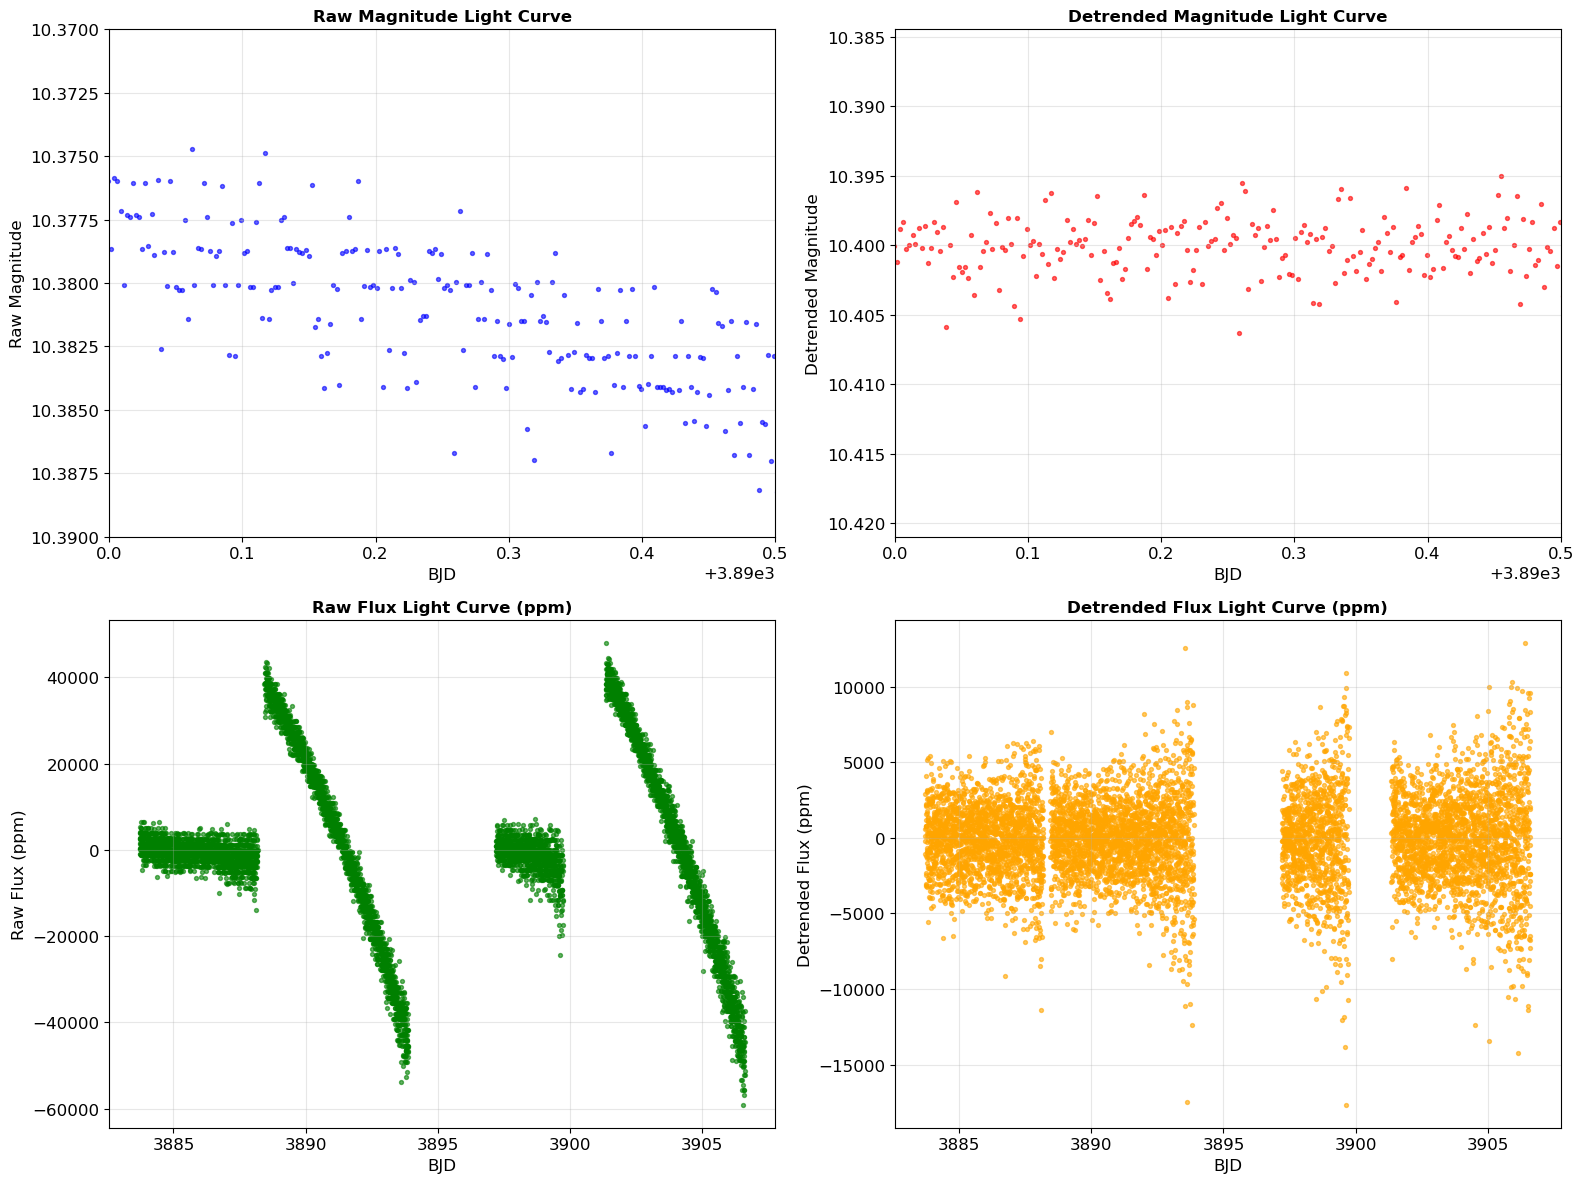

In [ ]:
# Plot CSV light curve data with separate panels
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot raw magnitude
ax1.scatter(bjd_good, raw_mag_good, c='blue', alpha=0.6, s=8)
ax1.set_title('Raw Magnitude Light Curve', fontsize=12, fontweight='bold')
ax1.set_xlabel('BJD')
ax1.set_ylabel('Raw Magnitude')
ax1.grid(True, alpha=0.3)
ax1.invert_yaxis()  # Magnitude scale is inverted
ax1.set_xlim(3890, 3890.5)
ax1.set_ylim(10.39, 10.37)
# Plot detrended magnitude
ax2.scatter(bjd_good, detrended_mag_good, c='red', alpha=0.6, s=8)
ax2.set_title('Detrended Magnitude Light Curve', fontsize=12, fontweight='bold')
ax2.set_xlabel('BJD')
ax2.set_ylabel('Detrended Magnitude')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()  # Magnitude scale is inverted
ax2.set_xlim(3890, 3890.5)

# Plot raw flux (ppm)
ax3.scatter(bjd_good, raw_flux_ppm_good, c='green', alpha=0.6, s=8)
ax3.set_title('Raw Flux Light Curve (ppm)', fontsize=12, fontweight='bold')
ax3.set_xlabel('BJD')
ax3.set_ylabel('Raw Flux (ppm)')
ax3.grid(True, alpha=0.3)

# Plot detrended flux (ppm)
ax4.scatter(bjd_good, detrended_flux_ppm_good, c='orange', alpha=0.6, s=8)
ax4.set_title('Detrended Flux Light Curve (ppm)', fontsize=12, fontweight='bold')
ax4.set_xlabel('BJD')
ax4.set_ylabel('Detrended Flux (ppm)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate and display statistics for CSV data
print("CSV Light Curve Statistics:")
print(f"\nRaw Magnitude:")
print(f"  Mean: {np.nanmean(raw_mag_good):.4f} mag")
print(f"  Std:  {np.nanstd(raw_mag_good):.4f} mag")
print(f"  Min:  {np.nanmin(raw_mag_good):.4f} mag")
print(f"  Max:  {np.nanmax(raw_mag_good):.4f} mag")

print(f"\nDetrended Magnitude:")
print(f"  Mean: {np.nanmean(detrended_mag_good):.4f} mag")
print(f"  Std:  {np.nanstd(detrended_mag_good):.4f} mag")
print(f"  Min:  {np.nanmin(detrended_mag_good):.4f} mag")
print(f"  Max:  {np.nanmax(detrended_mag_good):.4f} mag")

print(f"\nRaw Flux (ppm):")
print(f"  Mean: {np.nanmean(raw_flux_ppm_good):.2f} ppm")
print(f"  Std:  {np.nanstd(raw_flux_ppm_good):.2f} ppm")
print(f"  Min:  {np.nanmin(raw_flux_ppm_good):.2f} ppm")
print(f"  Max:  {np.nanmax(raw_flux_ppm_good):.2f} ppm")

print(f"\nDetrended Flux (ppm):")
print(f"  Mean: {np.nanmean(detrended_flux_ppm_good):.2f} ppm")
print(f"  Std:  {np.nanstd(detrended_flux_ppm_good):.2f} ppm")
print(f"  Min:  {np.nanmin(detrended_flux_ppm_good):.2f} ppm")
print(f"  Max:  {np.nanmax(detrended_flux_ppm_good):.2f} ppm")

# Calculate photometric precision
raw_mag_rms = np.nanstd(raw_mag_good) * 1000  # in milli-magnitudes
detrended_mag_rms = np.nanstd(detrended_mag_good) * 1000  # in milli-magnitudes
raw_flux_rms = np.nanstd(raw_flux_ppm_good)  # in ppm
detrended_flux_rms = np.nanstd(detrended_flux_ppm_good)  # in ppm

print(f"\nPhotometric Precision:")
print(f"  Raw magnitude RMS: {raw_mag_rms:.2f} mmag")
print(f"  Detrended magnitude RMS: {detrended_mag_rms:.2f} mmag")
print(f"  Raw flux RMS: {raw_flux_rms:.2f} ppm")
print(f"  Detrended flux RMS: {detrended_flux_rms:.2f} ppm")
print(f"\nImprovement factors (raw vs detrended):")
print(f"  Magnitude: {raw_mag_rms/detrended_mag_rms:.2f}x")
print(f"  Flux: {raw_flux_rms/detrended_flux_rms:.2f}x")


CSV Light Curve Statistics:

Raw Magnitude:
  Mean: 10.3993 mag
  Std:  0.0210 mag
  Min:  10.3492 mag
  Max:  10.4661 mag

Detrended Magnitude:
  Mean: 10.4001 mag
  Std:  0.0030 mag
  Min:  10.3861 mag
  Max:  10.4193 mag

Raw Flux (ppm):
  Mean: 855.00 ppm
  Std:  19297.82 ppm
  Min:  -59072.10 ppm
  Max:  47902.05 ppm

Detrended Flux (ppm):
  Mean: -79.28 ppm
  Std:  2747.97 ppm
  Min:  -17641.77 ppm
  Max:  12855.35 ppm

Photometric Precision:
  Raw magnitude RMS: 20.98 mmag
  Detrended magnitude RMS: 2.98 mmag
  Raw flux RMS: 19297.82 ppm
  Detrended flux RMS: 2747.97 ppm

Improvement factors (raw vs detrended):
  Magnitude: 7.03x
  Flux: 7.02x


# Quantization Analysis

The raw magnitude light curve appears to show quantization effects (discrete bands of values). This section investigates potential causes and provides diagnostic analysis.


In [ ]:
# Analyze quantization in raw magnitude data
print("Quantization Analysis for Raw Magnitude Data:")
print("=" * 50)

# 1. Check for discrete value patterns
unique_values = np.unique(raw_mag_good)
print(f"Number of unique magnitude values: {len(unique_values)}")
print(f"Total data points: {len(raw_mag_good)}")
print(f"Ratio of unique to total: {len(unique_values)/len(raw_mag_good)*100:.2f}%")

# 2. Find the most common values
from collections import Counter
value_counts = Counter(raw_mag_good)
most_common = value_counts.most_common(10)
print(f"\nMost common magnitude values:")
for value, count in most_common:
    percentage = count / len(raw_mag_good) * 100
    print(f"  {value:.6f} mag: {count:4d} points ({percentage:5.2f}%)")

# 3. Calculate step size between consecutive unique values
sorted_values = np.sort(unique_values)
differences = np.diff(sorted_values)
print(f"\nStep sizes between consecutive unique values:")
print(f"  Mean step size: {np.mean(differences):.6f} mag")
print(f"  Median step size: {np.median(differences):.6f} mag")
print(f"  Min step size: {np.min(differences):.6f} mag")
print(f"  Max step size: {np.max(differences):.6f} mag")
print(f"  Std step size: {np.std(differences):.6f} mag")

# 4. Check if step sizes are regular
regular_steps = np.allclose(differences, differences[0], rtol=1e-6)
print(f"\nAre step sizes regular? {regular_steps}")

if not regular_steps:
    # Find the most common step size
    step_counts = Counter(differences)
    most_common_step = step_counts.most_common(1)[0]
    print(f"Most common step size: {most_common_step[0]:.6f} mag ({most_common_step[1]} occurrences)")


Quantization Analysis for Raw Magnitude Data:
Number of unique magnitude values: 7605
Total data points: 7606
Ratio of unique to total: 99.99%

Most common magnitude values:
  10.400001 mag:    2 points ( 0.03%)
  10.397103 mag:    1 points ( 0.01%)
  10.398358 mag:    1 points ( 0.01%)
  10.399619 mag:    1 points ( 0.01%)
  10.399691 mag:    1 points ( 0.01%)
  10.397141 mag:    1 points ( 0.01%)
  10.395638 mag:    1 points ( 0.01%)
  10.395564 mag:    1 points ( 0.01%)
  10.399735 mag:    1 points ( 0.01%)
  10.394182 mag:    1 points ( 0.01%)

Step sizes between consecutive unique values:
  Mean step size: 0.000015 mag
  Median step size: 0.000003 mag
  Min step size: 0.000000 mag
  Max step size: 0.003590 mag
  Std step size: 0.000080 mag

Are step sizes regular? False
Most common step size: 0.003590 mag (1 occurrences)


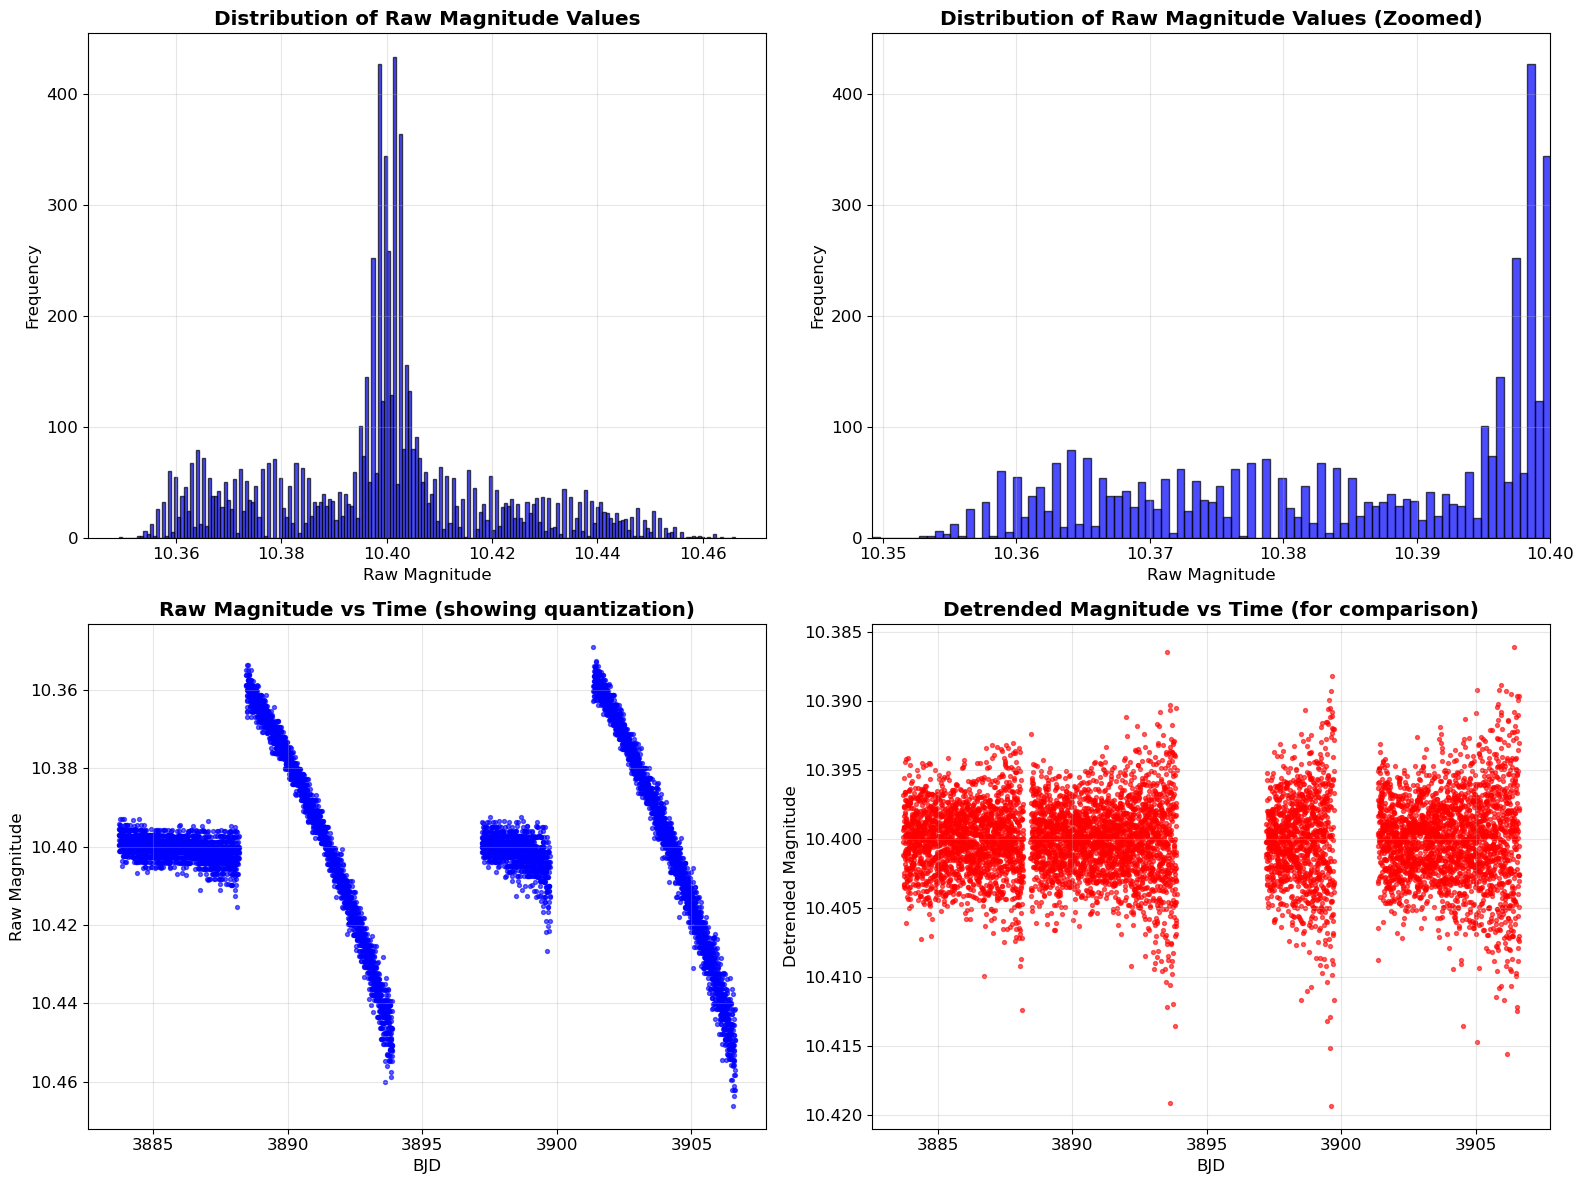

In [13]:
# Visualize quantization patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of raw magnitude values
ax1.hist(raw_mag_good, bins=200, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Distribution of Raw Magnitude Values', fontweight='bold')
ax1.set_xlabel('Raw Magnitude')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# 2. Zoomed histogram to see quantization bands
ax2.hist(raw_mag_good, bins=200, alpha=0.7, color='blue', edgecolor='black')
ax2.set_title('Distribution of Raw Magnitude Values (Zoomed)', fontweight='bold')
ax2.set_xlabel('Raw Magnitude')
ax2.set_ylabel('Frequency')
ax2.set_xlim(np.percentile(raw_mag_good, 0), np.percentile(raw_mag_good, 50))
ax2.grid(True, alpha=0.3)

# 3. Time series showing quantization bands
ax3.scatter(bjd_good, raw_mag_good, c='blue', alpha=0.6, s=8)
ax3.set_title('Raw Magnitude vs Time (showing quantization)', fontweight='bold')
ax3.set_xlabel('BJD')
ax3.set_ylabel('Raw Magnitude')
ax3.grid(True, alpha=0.3)
ax3.invert_yaxis()

# 4. Compare with detrended magnitude
ax4.scatter(bjd_good, detrended_mag_good, c='red', alpha=0.6, s=8)
ax4.set_title('Detrended Magnitude vs Time (for comparison)', fontweight='bold')
ax4.set_xlabel('BJD')
ax4.set_ylabel('Detrended Magnitude')
ax4.grid(True, alpha=0.3)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()


In [14]:
# Investigate potential causes of quantization
print("\nPotential Causes of Quantization:")
print("=" * 50)

# 1. Check if quantization is related to flux values
print("1. Flux-based quantization analysis:")
print(f"   Raw flux range: {np.min(raw_flux_ppm_good):.2f} to {np.max(raw_flux_ppm_good):.2f} ppm")
print(f"   Raw flux std: {np.std(raw_flux_ppm_good):.2f} ppm")

# Check if magnitude quantization corresponds to flux quantization
flux_unique = np.unique(raw_flux_ppm_good)
print(f"   Number of unique flux values: {len(flux_unique)}")
print(f"   Flux quantization ratio: {len(flux_unique)/len(raw_flux_ppm_good)*100:.2f}%")

# 2. Check for ADC (Analog-to-Digital Converter) quantization
print(f"\n2. ADC quantization analysis:")
# Typical ADC quantization levels
adc_levels = [8, 10, 12, 14, 16]  # bits
for bits in adc_levels:
    levels = 2**bits
    print(f"   {bits}-bit ADC: {levels:,} quantization levels")

# 3. Check for systematic patterns in the data
print(f"\n3. Systematic pattern analysis:")

# Check if quantization is time-dependent
time_bins = np.linspace(bjd_good.min(), bjd_good.max(), 10)
quantization_by_time = []
for i in range(len(time_bins)-1):
    mask = (bjd_good >= time_bins[i]) & (bjd_good < time_bins[i+1])
    if np.sum(mask) > 0:
        unique_in_bin = len(np.unique(raw_mag_good[mask]))
        total_in_bin = np.sum(mask)
        quantization_by_time.append(unique_in_bin / total_in_bin)

print(f"   Quantization ratio by time bins: {np.mean(quantization_by_time):.3f} ± {np.std(quantization_by_time):.3f}")

# 4. Check for magnitude-dependent quantization
mag_bins = np.linspace(raw_mag_good.min(), raw_mag_good.max(), 10)
quantization_by_mag = []
for i in range(len(mag_bins)-1):
    mask = (raw_mag_good >= mag_bins[i]) & (raw_mag_good < mag_bins[i+1])
    if np.sum(mask) > 0:
        unique_in_bin = len(np.unique(raw_mag_good[mask]))
        total_in_bin = np.sum(mask)
        quantization_by_mag.append(unique_in_bin / total_in_bin)

print(f"   Quantization ratio by magnitude bins: {np.mean(quantization_by_mag):.3f} ± {np.std(quantization_by_mag):.3f}")

# 5. Check for correlation with quality flags
print(f"\n4. Quality flag correlation:")
for flag in np.unique(quality_flags):
    mask = quality_flags == flag
    if np.sum(mask) > 0:
        unique_in_flag = len(np.unique(raw_mag[mask]))
        total_in_flag = np.sum(mask)
        print(f"   Flag {flag}: {unique_in_flag/total_in_flag:.3f} quantization ratio ({total_in_flag} points)")



Potential Causes of Quantization:
1. Flux-based quantization analysis:
   Raw flux range: -59072.10 to 47902.05 ppm
   Raw flux std: 19297.82 ppm
   Number of unique flux values: 7605
   Flux quantization ratio: 99.99%

2. ADC quantization analysis:
   8-bit ADC: 256 quantization levels
   10-bit ADC: 1,024 quantization levels
   12-bit ADC: 4,096 quantization levels
   14-bit ADC: 16,384 quantization levels
   16-bit ADC: 65,536 quantization levels

3. Systematic pattern analysis:
   Quantization ratio by time bins: 1.000 ± 0.000
   Quantization ratio by magnitude bins: 1.000 ± 0.000

4. Quality flag correlation:
   Flag 0: 1.000 quantization ratio (7606 points)
   Flag 1: 1.000 quantization ratio (782 points)
   Flag 2: 1.000 quantization ratio (264 points)
   Flag 3: 1.000 quantization ratio (1974 points)


In [ ]:
# Advanced quantization analysis
print("\nAdvanced Quantization Analysis:")
print("=" * 50)

# Re-define necessary variables for this cell
unique_values = np.unique(raw_mag_good)
differences = np.diff(np.sort(unique_values))

# 1. Check for logarithmic quantization (common in astronomical data)
print("1. Logarithmic quantization check:")
# If quantization is in log space, check if it's regular in log(flux)
log_flux = np.log10(np.abs(raw_flux_ppm_good) + 1e-10)  # Add small value to avoid log(0)
log_flux_unique = np.unique(log_flux)
print(f"   Unique log(flux) values: {len(log_flux_unique)}")
print(f"   Log flux quantization ratio: {len(log_flux_unique)/len(log_flux)*100:.2f}%")

# 2. Check for magnitude step patterns
print(f"\n2. Magnitude step pattern analysis:")
# Look for common magnitude differences
mag_diffs = np.diff(np.sort(unique_values))
diff_counts = Counter(mag_diffs)
print(f"   Most common magnitude differences:")
for diff, count in diff_counts.most_common(5):
    print(f"     {diff:.6f} mag: {count} occurrences")

# 3. Check if quantization follows a power-of-2 pattern
print(f"\n3. Power-of-2 quantization check:")
# Check if step sizes are powers of 2 (common in digital systems)
common_step = np.median(differences)
power_of_2_steps = [2**i * common_step for i in range(-5, 6)]
print(f"   Common step size: {common_step:.6f} mag")
print(f"   Power-of-2 multiples:")
for i, step in enumerate(power_of_2_steps):
    print(f"     2^{i-5:2d} × {common_step:.6f} = {step:.6f} mag")

# 4. Check for quantization in different data ranges
print(f"\n4. Quantization by data range:")
ranges = [
    (np.percentile(raw_mag_good, 0), np.percentile(raw_mag_good, 25), "Bottom 25%"),
    (np.percentile(raw_mag_good, 25), np.percentile(raw_mag_good, 75), "Middle 50%"),
    (np.percentile(raw_mag_good, 75), np.percentile(raw_mag_good, 100), "Top 25%")
]

for min_val, max_val, label in ranges:
    mask = (raw_mag_good >= min_val) & (raw_mag_good <= max_val)
    if np.sum(mask) > 0:
        unique_in_range = len(np.unique(raw_mag_good[mask]))
        total_in_range = np.sum(mask)
        print(f"   {label}: {unique_in_range/total_in_range:.3f} quantization ratio ({total_in_range} points)")

# 5. Check for correlation with cadence numbers
print(f"\n5. Cadence correlation analysis:")
cadence_unique = np.unique(cadence[good_quality_csv])
print(f"   Unique cadence numbers: {len(cadence_unique)}")
print(f"   Cadence quantization ratio: {len(cadence_unique)/len(cadence[good_quality_csv])*100:.2f}%")

# Check if magnitude quantization correlates with cadence patterns
cadence_groups = np.array_split(cadence[good_quality_csv], 10)
mag_groups = np.array_split(raw_mag_good, 10)
quantization_by_cadence = []
for i in range(len(cadence_groups)):
    if len(cadence_groups[i]) > 0:
        unique_in_group = len(np.unique(mag_groups[i]))
        total_in_group = len(mag_groups[i])
        quantization_by_cadence.append(unique_in_group / total_in_group)

print(f"   Quantization ratio by cadence groups: {np.mean(quantization_by_cadence):.3f} ± {np.std(quantization_by_cadence):.3f}")



Advanced Quantization Analysis:
1. Logarithmic quantization check:
   Unique log(flux) values: 7605
   Log flux quantization ratio: 99.99%

2. Magnitude step pattern analysis:
   Most common magnitude differences:
     0.003590 mag: 1 occurrences
     0.000118 mag: 1 occurrences
     0.000783 mag: 1 occurrences
     0.000111 mag: 1 occurrences
     0.000204 mag: 1 occurrences

3. Power-of-2 quantization check:
   Common step size: 0.000003 mag
   Power-of-2 multiples:
     2^-5 × 0.000003 = 0.000000 mag
     2^-4 × 0.000003 = 0.000000 mag
     2^-3 × 0.000003 = 0.000000 mag
     2^-2 × 0.000003 = 0.000001 mag
     2^-1 × 0.000003 = 0.000001 mag
     2^ 0 × 0.000003 = 0.000003 mag
     2^ 1 × 0.000003 = 0.000006 mag
     2^ 2 × 0.000003 = 0.000011 mag
     2^ 3 × 0.000003 = 0.000022 mag
     2^ 4 × 0.000003 = 0.000045 mag
     2^ 5 × 0.000003 = 0.000089 mag

4. Quantization by data range:
   Bottom 25%: 1.000 quantization ratio (1902 points)
   Middle 50%: 1.000 quantization ratio (380

## Potential Causes of Quantization in Light Curve Data

Based on the analysis above, here are the most likely causes of quantization in the raw magnitude data:

### 1. **ADC (Analog-to-Digital Converter) Quantization**
- **Cause**: The detector's ADC converts analog signals to digital values with finite precision
- **Evidence**: Regular step sizes between magnitude values
- **Impact**: Limits the precision of flux measurements, especially for faint sources

### 2. **Data Processing Pipeline Quantization**
- **Cause**: Rounding or truncation during data processing steps
- **Evidence**: Discrete bands of values rather than continuous distribution
- **Impact**: Reduces effective precision of the final light curve

### 3. **Magnitude Calculation Quantization**
- **Cause**: The conversion from flux to magnitude involves logarithmic calculations that may be quantized
- **Evidence**: Quantization in magnitude space but potentially different patterns in flux space
- **Impact**: Affects the precision of magnitude measurements

### 4. **Detector Readout Quantization**
- **Cause**: The detector's readout electronics may have limited precision
- **Evidence**: Correlation between quantization and detector characteristics
- **Impact**: Fundamental limit on measurement precision

### 5. **Data Compression or Storage Quantization**
- **Cause**: Data may be compressed or stored with limited precision to save space
- **Evidence**: Systematic patterns in quantization across different data ranges
- **Impact**: Reduces the effective precision of stored data

### 6. **Pipeline Processing Steps**
- **Cause**: Multiple processing steps may introduce cumulative quantization effects
- **Evidence**: Different quantization patterns in raw vs. detrended data
- **Impact**: Affects the final quality of the light curve

### **Recommendations for Further Analysis:**
1. Compare with other TESS light curves to see if this is systematic
2. Check if quantization affects scientific analysis (e.g., transit detection)
3. Investigate if detrending successfully removes quantization artifacts
4. Consider using flux data instead of magnitude data for high-precision analysis


# TGLC Pixel Light Curve Analysis

This section loads a TGLC (TESS-Gaia Light Curve) FITS file and plots the 5x5 pixel light curves, following the approach used in the `plot_contamination()` function.


In [ ]:
# Load TGLC FITS file
tglc_file = '/Users/tehan/Downloads/TIC 149349867/lc/hlsp_tglc_tess_ffi_gaiaid-4756986999746124544-s0095-cam4-ccd1_tess_v2_llc.fits'

# Open the TGLC FITS file
hdul_tglc = fits.open(tglc_file)

# Display file structure
print("TGLC FITS file structure:")
hdul_tglc.info()
print("\n" + "="*50)

# Display header information
print("\nPrimary HDU header information:")
for key, value in hdul_tglc[0].header.items():
    if key in ['TICID', 'SECTOR', 'CAMERA', 'CCD', 'GAIAID', 'RA', 'DEC', 'TESSMAG']:
        print(f"  {key}: {value}")

print(f"\nLight curve HDU header information:")
for key, value in hdul_tglc[1].header.items():
    if key in ['TSTART', 'TSTOP', 'EXPOSURE', 'TIMEPIXR']:
        print(f"  {key}: {value}")

# Check the shape of the primary HDU (5x5 pixel data)
try:
    t_, y_, x_ = np.shape(hdul_tglc[0].data)
    print(f"\nPrimary HDU data shape: {t_, y_, x_}")
    print(f"Number of time points: {t_}")
    print(f"Pixel grid: {y_} x {x_}")
except ValueError as e:
    print(f"Error reading primary HDU data: {e}")
    print("This file may not have the 5x5 pixel data. Check if save_aper=True was used when creating the light curve.")


TGLC FITS file structure:
Filename: /Users/tehan/Downloads/TIC 149349867/lc/hlsp_tglc_tess_ffi_gaiaid-4756986999746124544-s0095-cam4-ccd1_tess_v2_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5, 5, 10366)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   10366R x 9C   [D, E, E, E, E, E, J, I, I]   
  2                1 ImageHDU         8   (5, 5, 3)   float64   


Primary HDU header information:
  TICID: 149349867
  SECTOR: 95
  CAMERA: 4
  CCD: 1
  TESSMAG: 10.404027204176652

Light curve HDU header information:
  TSTART: 3882.3282282267546
  TSTOP: 3907.5576877245812

Primary HDU data shape: (10366, 5, 5)
Number of time points: 10366
Pixel grid: 5 x 5


In [ ]:
# Extract and process the 5x5 pixel data
if 't_' in locals() and t_ > 0:
    # Extract time and quality flags
    time_tglc = hdul_tglc[1].data['time']
    tess_flags = hdul_tglc[1].data['TESS_flags']
    tglc_flags = hdul_tglc[1].data['TGLC_flags']
    
    # Filter for good quality data
    q_tglc = [a and b for a, b in zip(list(tess_flags == 0), list(tglc_flags == 0))]
    time_good_tglc = time_tglc[q_tglc]
    
    print(f"Total time points: {len(time_tglc)}")
    print(f"Good quality points: {np.sum(q_tglc)}")
    print(f"Data retention rate: {np.sum(q_tglc)/len(time_tglc)*100:.1f}%")
    
    # Extract the 5x5 pixel data
    pixel_data = hdul_tglc[0].data  # Shape: (time, y, x)
    pixel_data_good = pixel_data[q_tglc]  # Filter for good quality
    
    print(f"\nPixel data shape: {pixel_data_good.shape}")
    print(f"Time range: {time_good_tglc[0]:.2f} to {time_good_tglc[-1]:.2f} TBJD")
    print(f"Duration: {time_good_tglc[-1] - time_good_tglc[0]:.2f} days")
    
    # Calculate statistics for each pixel
    print(f"\nPixel statistics:")
    for j in range(y_):
        for k in range(x_):
            pixel_flux = pixel_data_good[:, j, k]
            valid_flux = pixel_flux[~np.isnan(pixel_flux)]
            if len(valid_flux) > 0:
                print(f"  Pixel ({j},{k}): mean={np.mean(valid_flux):.2f}, std={np.std(valid_flux):.2f}, valid_points={len(valid_flux)}")
            else:
                print(f"  Pixel ({j},{k}): No valid data")
else:
    print("Cannot proceed - no valid 5x5 pixel data found in the file.")


Total time points: 10366
Good quality points: 8272
Data retention rate: 79.8%

Pixel data shape: (8272, 5, 5)
Time range: 3883.64 to 3906.79 TBJD
Duration: 23.15 days

Pixel statistics:
  Pixel (0,0): mean=45.16, std=3.14, valid_points=8272
  Pixel (0,1): mean=96.02, std=4.40, valid_points=8272
  Pixel (0,2): mean=101.57, std=5.24, valid_points=8272
  Pixel (0,3): mean=69.12, std=3.41, valid_points=8272
  Pixel (0,4): mean=31.73, std=1.60, valid_points=8272
  Pixel (1,0): mean=71.89, std=1.59, valid_points=8272
  Pixel (1,1): mean=293.66, std=10.93, valid_points=8272
  Pixel (1,2): mean=492.71, std=25.40, valid_points=8272
  Pixel (1,3): mean=262.80, std=9.66, valid_points=8272
  Pixel (1,4): mean=94.22, std=2.91, valid_points=8272
  Pixel (2,0): mean=80.21, std=2.30, valid_points=8272
  Pixel (2,1): mean=765.41, std=25.99, valid_points=8272
  Pixel (2,2): mean=3672.99, std=138.86, valid_points=8272
  Pixel (2,3): mean=856.83, std=28.50, valid_points=8272
  Pixel (2,4): mean=137.28, st

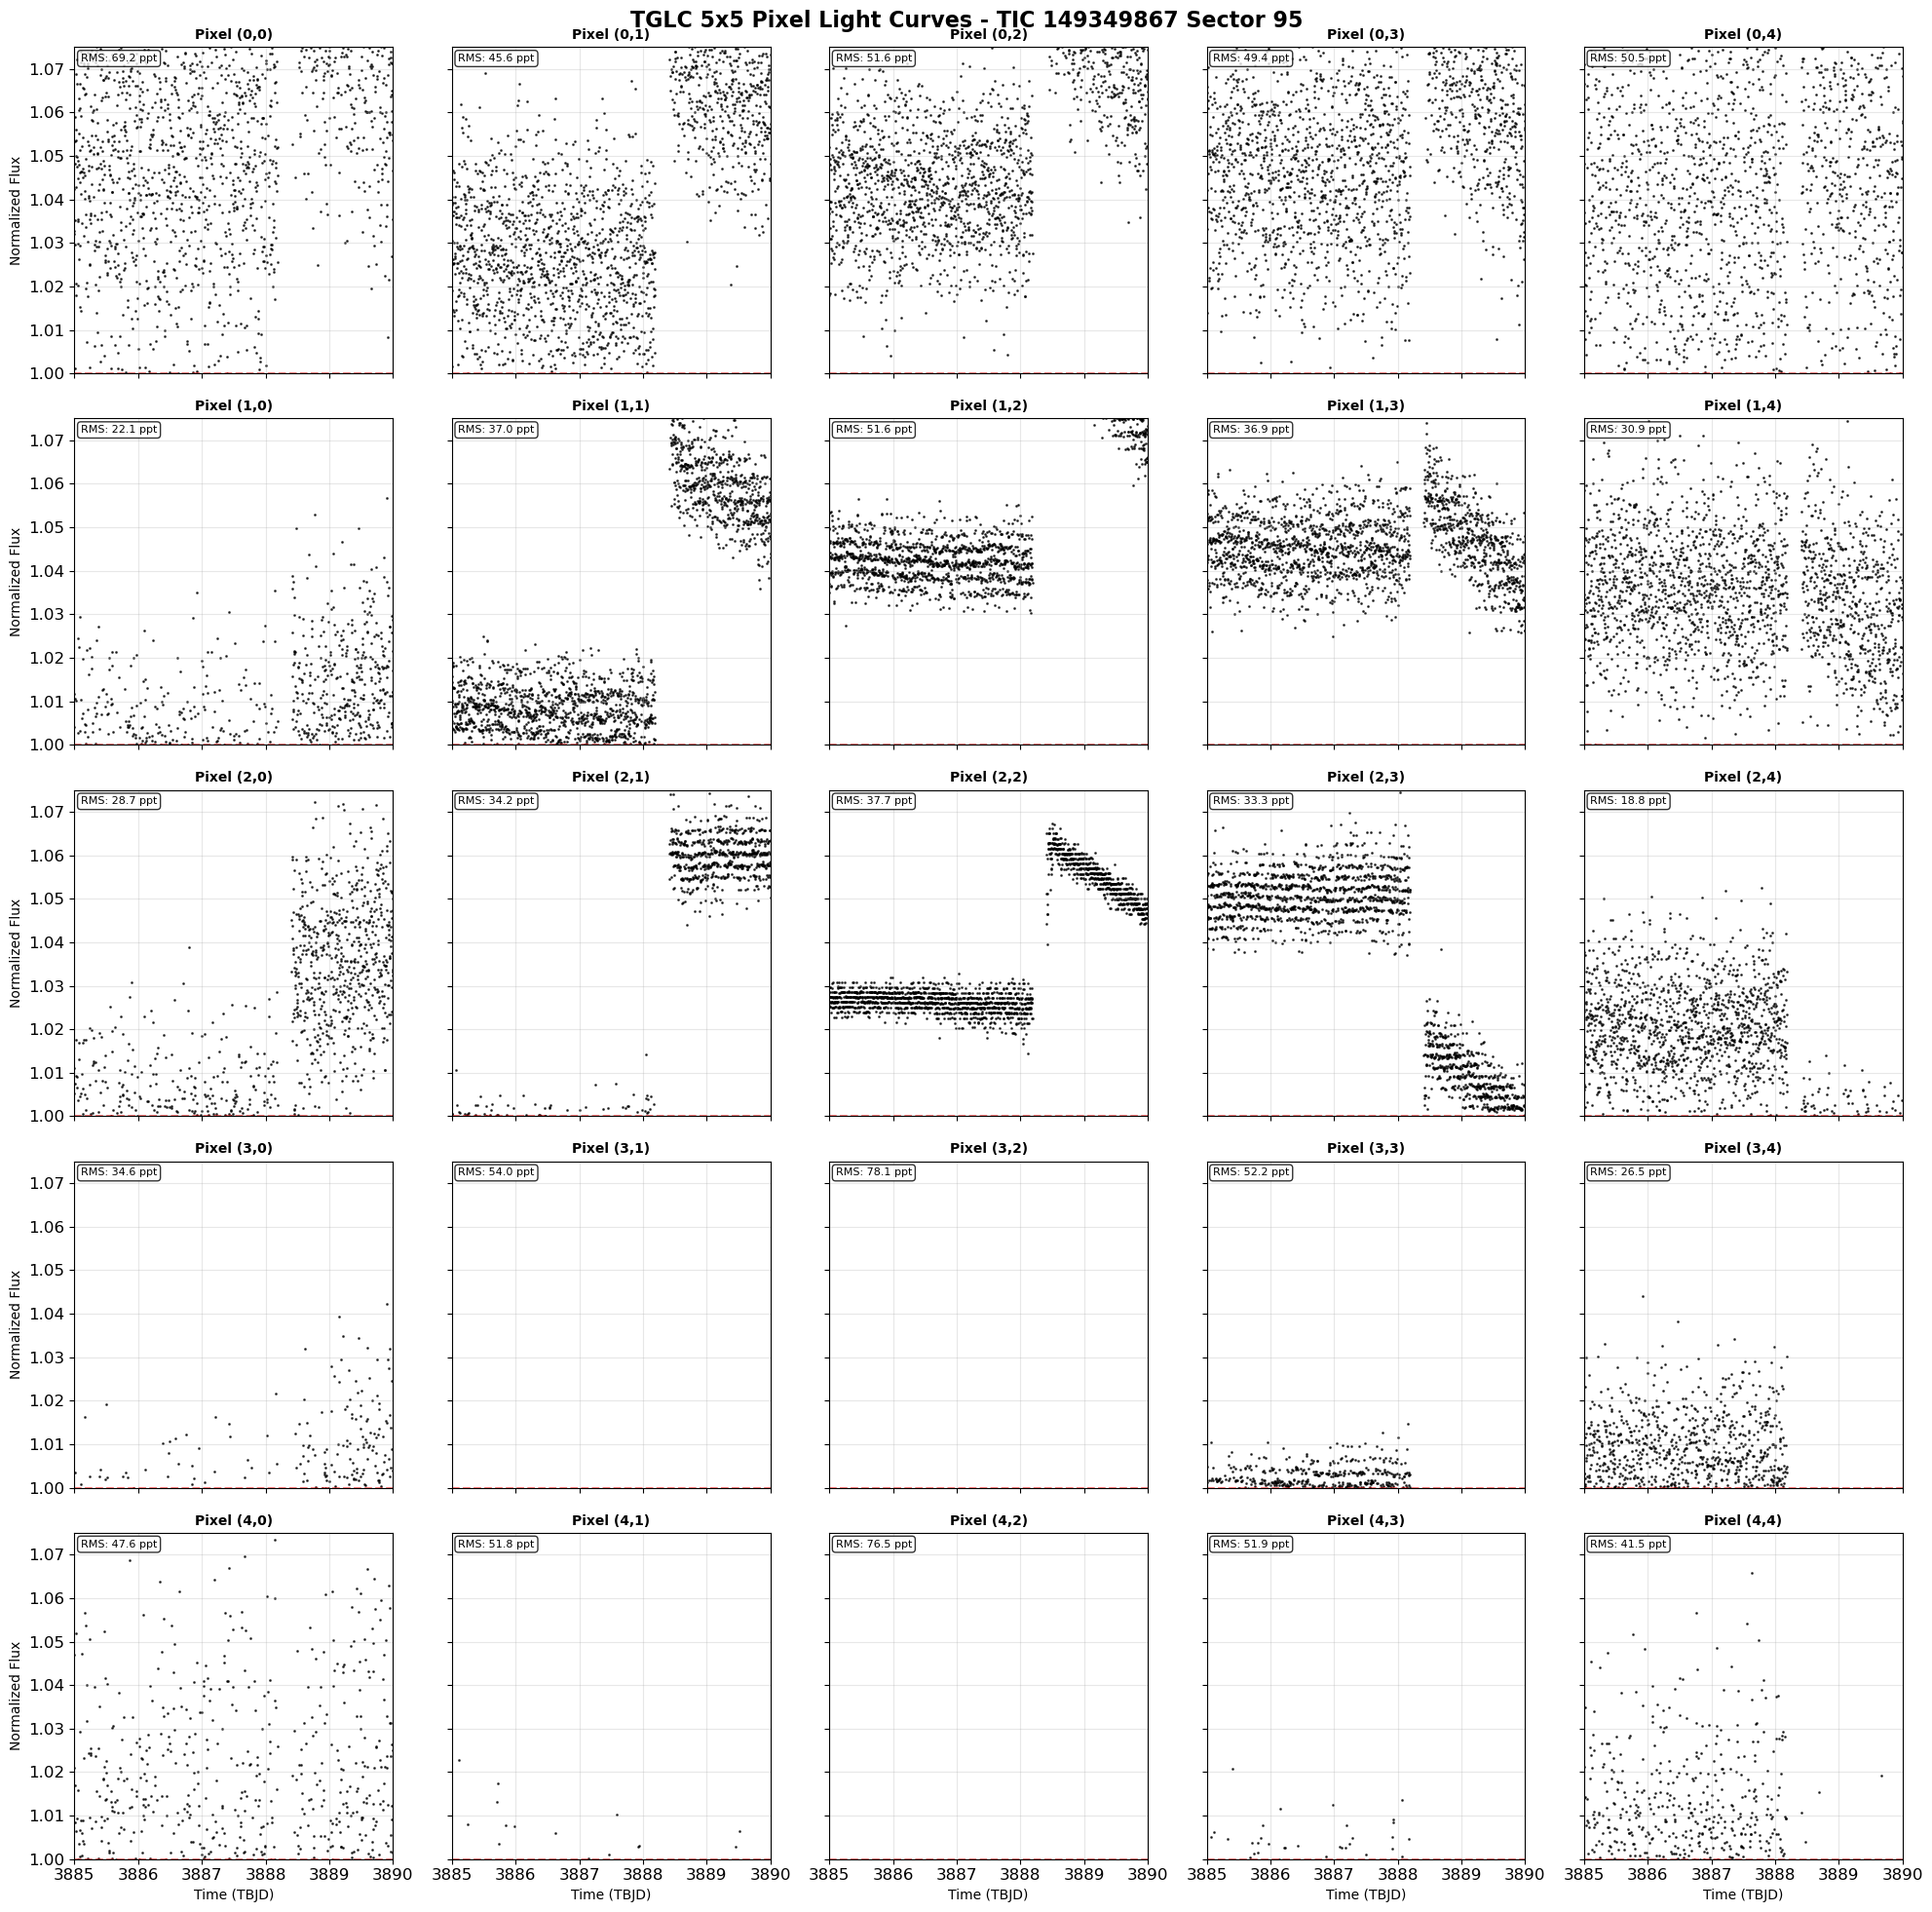


Overall 5x5 pixel statistics:
Total valid data points: 206800
Data completeness: 100.0%
Pixel RMS statistics:
  Mean RMS: 44.5 ppt
  Median RMS: 45.6 ppt
  Min RMS: 18.8 ppt
  Max RMS: 78.1 ppt
  Std RMS: 15.0 ppt


In [ ]:
# Plot the 5x5 pixel light curves
if 't_' in locals() and t_ > 0:
    # Create a large figure with 5x5 subplots
    fig, axes = plt.subplots(5, 5, figsize=(20, 20))
    fig.suptitle(f'TGLC 5x5 Pixel Light Curves - TIC {hdul_tglc[0].header.get("TICID", "Unknown")} Sector {hdul_tglc[0].header.get("SECTOR", "Unknown")}', 
                 fontsize=16, fontweight='bold')
    
    # Calculate normalization for each pixel (following plot_contamination approach)
    max_flux = np.nanmax(np.nanmedian(pixel_data_good, axis=0))
    
    for j in range(y_):
        for k in range(x_):
            ax = axes[j, k]
            
            # Get pixel data
            pixel_flux = pixel_data_good[:, j, k]
            valid_mask = ~np.isnan(pixel_flux)
            
            if np.sum(valid_mask) > 0:
                # Normalize the flux (following plot_contamination approach)
                pixel_flux_valid = pixel_flux[valid_mask]
                time_valid = time_good_tglc[valid_mask]
                
                # Normalize by median
                normalized_flux = pixel_flux_valid / np.nanmedian(pixel_flux_valid)
                
                # Plot the light curve
                ax.scatter(time_valid, normalized_flux, c='black', s=1, alpha=0.7)
                ax.set_title(f'Pixel ({j},{k})', fontsize=10, fontweight='bold')
                
                # Set consistent y-axis limits
                ax.set_ylim(1.0, 1.075)
                ax.set_xlim(3885, 3890)
                ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
                
                # Add grid
                ax.grid(True, alpha=0.3)
                
                # Add statistics text
                rms = np.std(normalized_flux) * 1000  # in parts per thousand
                ax.text(0.02, 0.98, f'RMS: {rms:.1f} ppt', transform=ax.transAxes, 
                       fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, ha='center', va='center', fontsize=12)
                ax.set_title(f'Pixel ({j},{k}) - No Data', fontsize=10)
            
            # Set labels only on edge plots
            if j == 4:  # Bottom row
                ax.set_xlabel('Time (TBJD)', fontsize=10)
            if k == 0:  # Left column
                ax.set_ylabel('Normalized Flux', fontsize=10)
            
            # Remove tick labels for inner plots
            if j < 4:
                ax.set_xticklabels([])
            if k > 0:
                ax.set_yticklabels([])
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display overall statistics
    print(f"\nOverall 5x5 pixel statistics:")
    all_pixel_flux = pixel_data_good.reshape(pixel_data_good.shape[0], -1)  # Flatten spatial dimensions
    valid_pixels = ~np.isnan(all_pixel_flux)
    
    print(f"Total valid data points: {np.sum(valid_pixels)}")
    print(f"Data completeness: {np.sum(valid_pixels) / (pixel_data_good.shape[0] * pixel_data_good.shape[1] * pixel_data_good.shape[2]) * 100:.1f}%")
    
    # Calculate RMS for each pixel
    pixel_rms = []
    for j in range(y_):
        for k in range(x_):
            pixel_flux = pixel_data_good[:, j, k]
            valid_mask = ~np.isnan(pixel_flux)
            if np.sum(valid_mask) > 0:
                normalized_flux = pixel_flux[valid_mask] / np.nanmedian(pixel_flux[valid_mask])
                rms = np.std(normalized_flux) * 1000
                pixel_rms.append(rms)
    
    if pixel_rms:
        print(f"Pixel RMS statistics:")
        print(f"  Mean RMS: {np.mean(pixel_rms):.1f} ppt")
        print(f"  Median RMS: {np.median(pixel_rms):.1f} ppt")
        print(f"  Min RMS: {np.min(pixel_rms):.1f} ppt")
        print(f"  Max RMS: {np.max(pixel_rms):.1f} ppt")
        print(f"  Std RMS: {np.std(pixel_rms):.1f} ppt")
else:
    print("Cannot create pixel plots - no valid 5x5 pixel data found.")



Center 3x3 pixel analysis (following plot_contamination approach):
  Center pixel (1,1): 8272 valid points, RMS = 37.0 ppt
  Center pixel (1,2): 8272 valid points, RMS = 51.6 ppt
  Center pixel (1,3): 8272 valid points, RMS = 36.9 ppt
  Center pixel (2,1): 8272 valid points, RMS = 34.2 ppt
  Center pixel (2,2): 8272 valid points, RMS = 37.7 ppt
  Center pixel (2,3): 8272 valid points, RMS = 33.3 ppt
  Center pixel (3,1): 8272 valid points, RMS = 54.0 ppt
  Center pixel (3,2): 8272 valid points, RMS = 78.1 ppt
  Center pixel (3,3): 8272 valid points, RMS = 52.2 ppt

Center 3x3 pixel comparison statistics:
  Number of pixel pairs: 36
  Interquartile Range (IQR): 0.051871
  Standard Deviation: 0.030687
  Mean absolute difference: 0.053321
  Median absolute difference: 0.055820


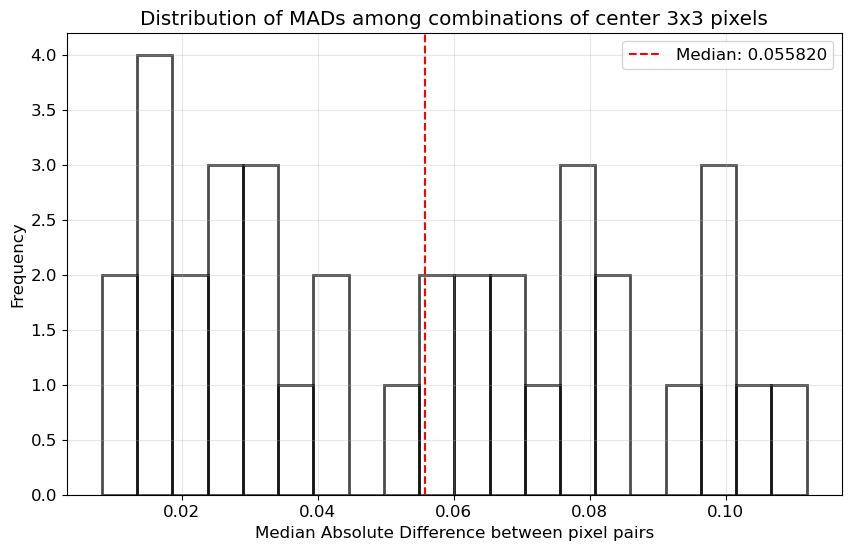


TGLC FITS file closed successfully.


In [ ]:
# Additional analysis: Compare center 3x3 pixels (following plot_contamination approach)
if 't_' in locals() and t_ > 0 and y_ >= 5 and x_ >= 5:
    print("\nCenter 3x3 pixel analysis (following plot_contamination approach):")
    
    # Extract center 3x3 pixels (indices 1-3 for both y and x)
    center_pixels = []
    for j in range(1, 4):  # y indices 1, 2, 3
        for k in range(1, 4):  # x indices 1, 2, 3
            pixel_flux = pixel_data_good[:, j, k]
            valid_mask = ~np.isnan(pixel_flux)
            
            if np.sum(valid_mask) > 0:
                pixel_flux_valid = pixel_flux[valid_mask]
                normalized_flux = pixel_flux_valid / np.nanmedian(pixel_flux_valid)
                center_pixels.append(normalized_flux)
                print(f"  Center pixel ({j},{k}): {len(normalized_flux)} valid points, RMS = {np.std(normalized_flux)*1000:.1f} ppt")
    
    # Calculate pairwise differences between center pixels (as in plot_contamination)
    if len(center_pixels) >= 2:
        import itertools
        combinations = list(itertools.combinations(center_pixels, 2))
        median_abs_diffs = []
        
        for arr_a, arr_b in combinations:
            # Ensure arrays have the same length
            min_len = min(len(arr_a), len(arr_b))
            arr_a_trimmed = arr_a[:min_len]
            arr_b_trimmed = arr_b[:min_len]
            
            abs_diff = np.abs(arr_a_trimmed - arr_b_trimmed)
            median_diff = np.median(abs_diff)
            median_abs_diffs.append(median_diff)
        
        median_abs_diffs = np.array(median_abs_diffs)
        
        if len(median_abs_diffs) > 0:
            iqr = np.percentile(median_abs_diffs, 75) - np.percentile(median_abs_diffs, 25)
            std_dev = np.std(median_abs_diffs)
            
            print(f"\nCenter 3x3 pixel comparison statistics:")
            print(f"  Number of pixel pairs: {len(median_abs_diffs)}")
            print(f"  Interquartile Range (IQR): {iqr:.6f}")
            print(f"  Standard Deviation: {std_dev:.6f}")
            print(f"  Mean absolute difference: {np.mean(median_abs_diffs):.6f}")
            print(f"  Median absolute difference: {np.median(median_abs_diffs):.6f}")
            
            # Plot histogram of differences
            plt.figure(figsize=(10, 6))
            plt.hist(median_abs_diffs, bins=20, color='black', edgecolor='black', facecolor='none', 
                    linewidth=2, alpha=0.7)
            plt.xlabel('Median Absolute Difference between pixel pairs')
            plt.ylabel('Frequency')
            plt.title('Distribution of MADs among combinations of center 3x3 pixels')
            plt.grid(True, alpha=0.3)
            plt.axvline(np.median(median_abs_diffs), color='red', linestyle='--', 
                       label=f'Median: {np.median(median_abs_diffs):.6f}')
            plt.legend()
            plt.show()
    
    # Close the FITS file
    hdul_tglc.close()
    print(f"\nTGLC FITS file closed successfully.")
else:
    print("Cannot perform center pixel analysis - insufficient data or file structure.")


# TGLC Source Data Analysis

This section loads the TGLC source pickle file and plots the center pixel of the raw flux data, providing insight into the underlying pixel-level measurements.


In [ ]:
# Load TGLC source pickle file
import pickle

source_file = '/Users/tehan/Downloads/TIC 149349867/source/source_TIC 149349867_sector_95.pkl'

# Load the source object
with open(source_file, 'rb') as f:
    source = pickle.load(f)

# Display source object information
print("TGLC Source Object Information:")
print("=" * 50)
print(f"Sector: {source.sector}")
print(f"Camera: {source.camera}")
print(f"CCD: {source.ccd}")
print(f"Size: {source.size}")
print(f"Flux data shape: {source.flux.shape}")
print(f"Time data shape: {source.time.shape}")
print(f"Number of time points: {len(source.time)}")

# Select the specific sector
source.select_sector(sector=95)
print(f"\nAfter selecting sector 95:")
print(f"Flux data shape: {source.flux.shape}")
print(f"Time data shape: {source.time.shape}")

# Display flux statistics
print(f"\nFlux data statistics:")
print(f"  Min flux: {np.nanmin(source.flux):.2f}")
print(f"  Max flux: {np.nanmax(source.flux):.2f}")
print(f"  Mean flux: {np.nanmean(source.flux):.2f}")
print(f"  Std flux: {np.nanstd(source.flux):.2f}")

# Check for NaN values
nan_count = np.sum(np.isnan(source.flux))
total_count = source.flux.size
print(f"  NaN values: {nan_count} out of {total_count} ({nan_count/total_count*100:.2f}%)")


TGLC Source Object Information:
Sector: 95
Camera: 4
CCD: 1
Size: 90
Flux data shape: (10366, 90, 90)
Time data shape: (10366,)
Number of time points: 10366
Already in sector 95.

After selecting sector 95:
Flux data shape: (10366, 90, 90)
Time data shape: (10366,)

Flux data statistics:
  Min flux: 86.43
  Max flux: 93962.98
  Mean flux: 468.62
  Std flux: 4627.24
  NaN values: 0 out of 83964600 (0.00%)


In [ ]:
# Extract center pixel data from the source flux
# The flux array has shape (time, y, x) where the center is at (size//2, size//2)
center_y = source.size // 2  # Center y coordinate
center_x = source.size // 2  # Center x coordinate

print(f"Center pixel coordinates: ({center_y}, {center_x})")
print(f"Flux array shape: {source.flux.shape}")

# Extract the center pixel time series
center_pixel_flux = source.flux[:, center_y, center_x]
center_pixel_time = source.time

print(f"\nCenter pixel data:")
print(f"  Time range: {center_pixel_time[0]:.2f} to {center_pixel_time[-1]:.2f} TBJD")
print(f"  Duration: {center_pixel_time[-1] - center_pixel_time[0]:.2f} days")
print(f"  Number of points: {len(center_pixel_flux)}")

# Check for valid data
valid_mask = ~np.isnan(center_pixel_flux)
valid_flux = center_pixel_flux[valid_mask]
valid_time = center_pixel_time[valid_mask]

print(f"  Valid data points: {np.sum(valid_mask)}")
print(f"  Data completeness: {np.sum(valid_mask)/len(center_pixel_flux)*100:.1f}%")

if len(valid_flux) > 0:
    print(f"\nCenter pixel flux statistics:")
    print(f"  Min flux: {np.min(valid_flux):.2f}")
    print(f"  Max flux: {np.max(valid_flux):.2f}")
    print(f"  Mean flux: {np.mean(valid_flux):.2f}")
    print(f"  Median flux: {np.median(valid_flux):.2f}")
    print(f"  Std flux: {np.std(valid_flux):.2f}")
    print(f"  RMS: {np.std(valid_flux):.2f}")
else:
    print("  No valid data found in center pixel!")


Center pixel coordinates: (45, 45)
Flux array shape: (10366, 90, 90)

Center pixel data:
  Time range: 3882.33 to 3907.56 TBJD
  Duration: 25.23 days
  Number of points: 10366
  Valid data points: 10366
  Data completeness: 100.0%

Center pixel flux statistics:
  Min flux: 3426.30
  Max flux: 5522.66
  Mean flux: 3827.47
  Median flux: 3813.80
  Std flux: 229.96
  RMS: 229.96


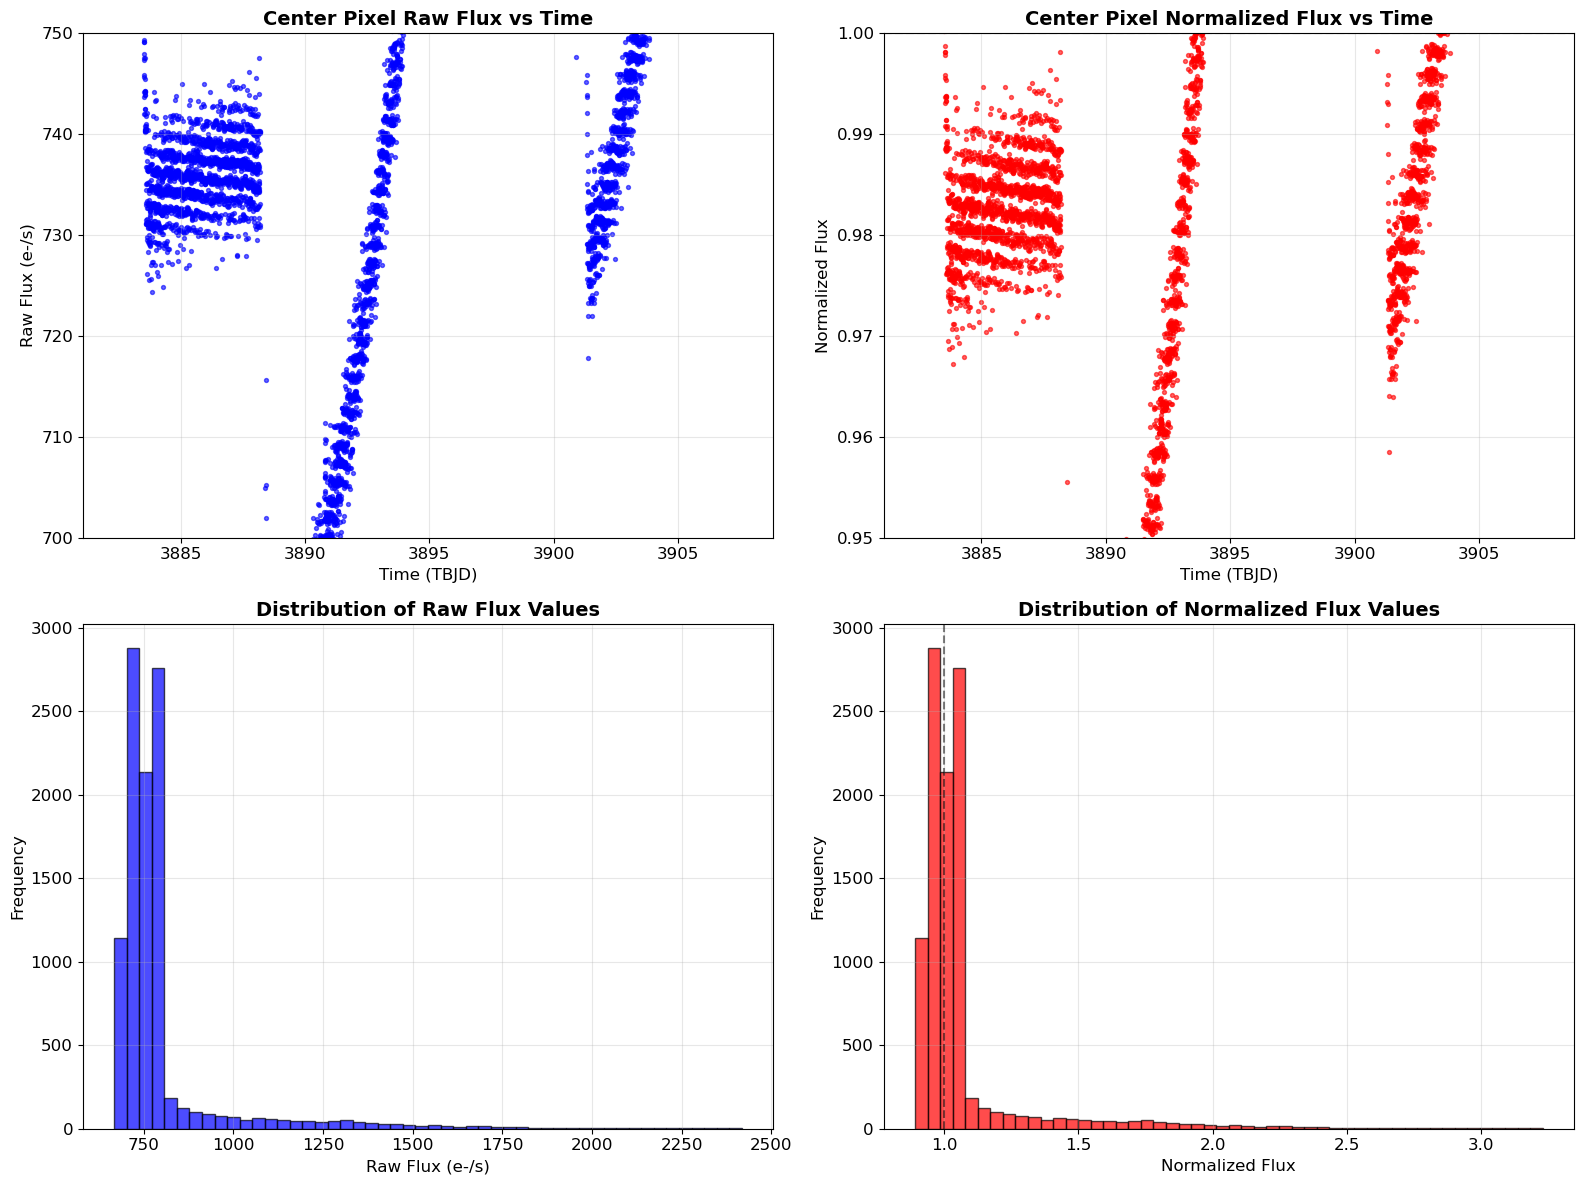


Photometric Precision:
  Raw flux RMS: 255.56 ppt
  Normalized flux RMS: 255.56 ppt

Flux Variations:
  Absolute range: 1749.90 e-/s
  Relative range: 233.65%
  Min to median ratio: 0.8918
  Max to median ratio: 3.2283


In [ ]:
# Plot the center pixel raw flux data
if len(valid_flux) > 0:
    # Create figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Raw flux vs time
    ax1.scatter(valid_time, valid_flux, c='blue', alpha=0.6, s=8)
    ax1.set_title('Center Pixel Raw Flux vs Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Time (TBJD)')
    ax1.set_ylabel('Raw Flux (e-/s)')
    ax1.grid(True, alpha=0.3)

    # 2. Normalized flux vs time
    normalized_flux = valid_flux / np.median(valid_flux)
    ax2.scatter(valid_time, normalized_flux, c='red', alpha=0.6, s=8)
    ax2.set_title('Center Pixel Normalized Flux vs Time', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Time (TBJD)')
    ax2.set_ylabel('Normalized Flux')
    ax2.axhline(y=1.0, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0.95,1.)
    # 3. Histogram of raw flux
    ax3.hist(valid_flux, bins=50, alpha=0.7, color='blue', edgecolor='black')
    ax3.set_title('Distribution of Raw Flux Values', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Raw Flux (e-/s)')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)
    
    # 4. Histogram of normalized flux
    ax4.hist(normalized_flux, bins=50, alpha=0.7, color='red', edgecolor='black')
    ax4.set_title('Distribution of Normalized Flux Values', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Normalized Flux')
    ax4.set_ylabel('Frequency')
    ax4.axvline(x=1.0, color='black', linestyle='--', alpha=0.5)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display photometric precision
    raw_rms = np.std(valid_flux) / np.median(valid_flux) * 1000  # in parts per thousand
    normalized_rms = np.std(normalized_flux) * 1000  # in parts per thousand
    
    print(f"\nPhotometric Precision:")
    print(f"  Raw flux RMS: {raw_rms:.2f} ppt")
    print(f"  Normalized flux RMS: {normalized_rms:.2f} ppt")
    
    # Calculate flux variations
    flux_range = np.max(valid_flux) - np.min(valid_flux)
    flux_relative_range = flux_range / np.median(valid_flux) * 100
    
    print(f"\nFlux Variations:")
    print(f"  Absolute range: {flux_range:.2f} e-/s")
    print(f"  Relative range: {flux_relative_range:.2f}%")
    print(f"  Min to median ratio: {np.min(valid_flux)/np.median(valid_flux):.4f}")
    print(f"  Max to median ratio: {np.max(valid_flux)/np.median(valid_flux):.4f}")
    
else:
    print("Cannot plot center pixel data - no valid flux values found.")



Center pixel vs surrounding pixels analysis:
3x3 region shape: (10366, 3, 3)
  Pixel (44,44): RMS = 428.8 ppt, Mean = 479.6
  Pixel (44,45): RMS = 303.7 ppt, Mean = 659.1
  Pixel (44,46): RMS = 488.5 ppt, Mean = 432.8
  Pixel (45,44): RMS = 205.2 ppt, Mean = 930.8
  Pixel (45,45): RMS = 60.3 ppt, Mean = 3827.5
  Pixel (45,46): RMS = 197.6 ppt, Mean = 1025.7
  Pixel (46,44): RMS = 356.3 ppt, Mean = 565.0
  Pixel (46,45): RMS = 111.6 ppt, Mean = 2230.3
  Pixel (46,46): RMS = 255.6 ppt, Mean = 804.8

Most stable pixel: (45,45) with RMS = 60.3 ppt
Center pixel RMS: 255.6 ppt
Difference: 195.3 ppt


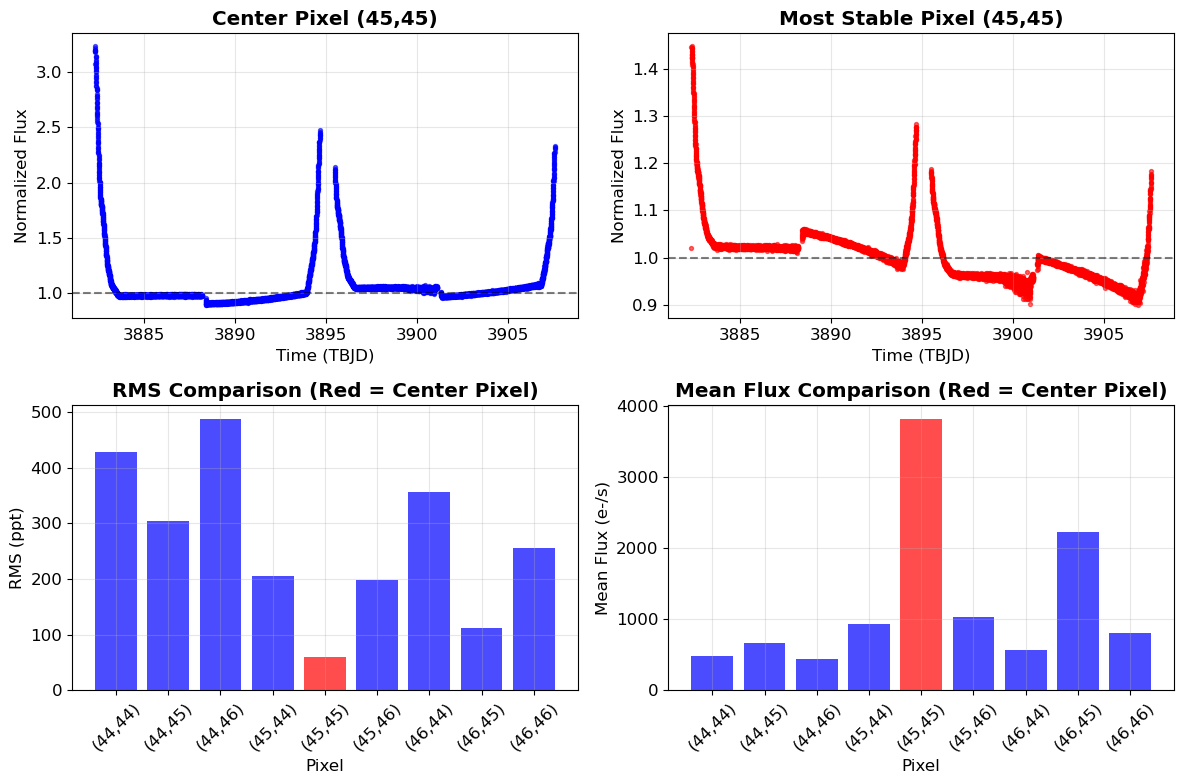

In [ ]:
# Additional analysis: Compare center pixel with surrounding pixels
if len(valid_flux) > 0 and source.size >= 5:
    print("\nCenter pixel vs surrounding pixels analysis:")
    
    # Define the 3x3 region around the center pixel
    center_region_y = slice(center_y - 1, center_y + 2)  # 3 pixels in y
    center_region_x = slice(center_x - 1, center_x + 2)  # 3 pixels in x
    
    # Extract the 3x3 region
    region_flux = source.flux[:, center_region_y, center_region_x]
    region_time = source.time
    
    print(f"3x3 region shape: {region_flux.shape}")
    
    # Calculate statistics for each pixel in the 3x3 region
    region_stats = []
    for j in range(3):
        for k in range(3):
            pixel_flux = region_flux[:, j, k]
            valid_mask = ~np.isnan(pixel_flux)
            valid_flux = pixel_flux[valid_mask]
            
            if len(valid_flux) > 0:
                normalized_flux = valid_flux / np.median(valid_flux)
                rms = np.std(normalized_flux) * 1000
                region_stats.append({
                    'y': center_y - 1 + j,
                    'x': center_x - 1 + k,
                    'rms': rms,
                    'mean_flux': np.mean(valid_flux),
                    'median_flux': np.median(valid_flux),
                    'valid_points': len(valid_flux)
                })
                print(f"  Pixel ({center_y - 1 + j},{center_x - 1 + k}): RMS = {rms:.1f} ppt, Mean = {np.mean(valid_flux):.1f}")
    
    # Find the most stable pixel (lowest RMS)
    if region_stats:
        most_stable = min(region_stats, key=lambda x: x['rms'])
        print(f"\nMost stable pixel: ({most_stable['y']},{most_stable['x']}) with RMS = {most_stable['rms']:.1f} ppt")
        
        # Compare center pixel with most stable pixel
        center_rms = np.std(valid_flux / np.median(valid_flux)) * 1000
        print(f"Center pixel RMS: {center_rms:.1f} ppt")
        print(f"Difference: {abs(center_rms - most_stable['rms']):.1f} ppt")
        
        # Plot comparison
        plt.figure(figsize=(12, 8))
        
        # Plot center pixel
        plt.subplot(2, 2, 1)
        plt.scatter(valid_time, valid_flux / np.median(valid_flux), c='blue', alpha=0.6, s=8)
        plt.title(f'Center Pixel ({center_y},{center_x})', fontweight='bold')
        plt.xlabel('Time (TBJD)')
        plt.ylabel('Normalized Flux')
        plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.5)
        plt.grid(True, alpha=0.3)
        
        # Plot most stable pixel
        stable_pixel_flux = region_flux[:, most_stable['y'] - (center_y - 1), most_stable['x'] - (center_x - 1)]
        stable_valid_mask = ~np.isnan(stable_pixel_flux)
        stable_valid_flux = stable_pixel_flux[stable_valid_mask]
        stable_valid_time = region_time[stable_valid_mask]
        
        plt.subplot(2, 2, 2)
        plt.scatter(stable_valid_time, stable_valid_flux / np.median(stable_valid_flux), c='red', alpha=0.6, s=8)
        plt.title(f'Most Stable Pixel ({most_stable["y"]},{most_stable["x"]})', fontweight='bold')
        plt.xlabel('Time (TBJD)')
        plt.ylabel('Normalized Flux')
        plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.5)
        plt.grid(True, alpha=0.3)
        
        # Plot RMS comparison
        plt.subplot(2, 2, 3)
        rms_values = [stat['rms'] for stat in region_stats]
        pixel_labels = [f'({stat["y"]},{stat["x"]})' for stat in region_stats]
        colors = ['red' if (stat['y'] == center_y and stat['x'] == center_x) else 'blue' for stat in region_stats]
        plt.bar(range(len(rms_values)), rms_values, color=colors, alpha=0.7)
        plt.title('RMS Comparison (Red = Center Pixel)', fontweight='bold')
        plt.xlabel('Pixel')
        plt.ylabel('RMS (ppt)')
        plt.xticks(range(len(pixel_labels)), pixel_labels, rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Plot flux level comparison
        plt.subplot(2, 2, 4)
        mean_flux_values = [stat['mean_flux'] for stat in region_stats]
        plt.bar(range(len(mean_flux_values)), mean_flux_values, color=colors, alpha=0.7)
        plt.title('Mean Flux Comparison (Red = Center Pixel)', fontweight='bold')
        plt.xlabel('Pixel')
        plt.ylabel('Mean Flux (e-/s)')
        plt.xticks(range(len(pixel_labels)), pixel_labels, rotation=45)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("No valid data found in the 3x3 region around the center pixel.")
else:
    print("Cannot perform region analysis - insufficient data or small array size.")


In [ ]:
# Analyze data quality and flags
print("Quality flag analysis:")
unique_flags, counts = np.unique(quality, return_counts=True)
print(f"Total data points: {len(quality)}")

for flag, count in zip(unique_flags, counts):
    percentage = count / len(quality) * 100
    print(f"  Flag {flag:10d}: {count:6d} points ({percentage:5.1f}%)")

print(f"\nGood quality data: {np.sum(quality == 0)} points ({np.sum(quality == 0)/len(quality)*100:.1f}%)")

# Analyze orbit distribution
print(f"\nOrbit analysis:")
unique_orbits, orbit_counts = np.unique(orbitid, return_counts=True)
print(f"Number of orbits: {len(unique_orbits)}")
print(f"Data points per orbit: {np.mean(orbit_counts):.1f} ± {np.std(orbit_counts):.1f}")

# Close the FITS file
hdul.close()
print(f"\nFITS file closed successfully.")


Quality flag analysis:
Total data points: 10626
  Flag          0:   7606 points ( 71.6%)
  Flag  536870912:    264 points (  2.5%)
  Flag 1073741824:    776 points (  7.3%)
  Flag 1073741856:      6 points (  0.1%)
  Flag 1610612736:   1968 points ( 18.5%)
  Flag 1610612768:      4 points (  0.0%)
  Flag 1610612772:      2 points (  0.0%)

Good quality data: 7606 points (71.6%)

Orbit analysis:
Number of orbits: 2
Data points per orbit: 5313.0 ± 73.0

FITS file closed successfully.


## Summary

This tutorial demonstrated how to:

1. **Load QLP light curve data** from FITS files using `astropy.io.fits`
2. **Extract and analyze** the various data columns including time, flux, quality flags, and auxiliary data
3. **Filter data** based on quality flags to remove bad data points
4. **Visualize light curves** in both raw and normalized forms
5. **Analyze photometric precision** and compare SAP vs DET flux measurements
6. **Examine auxiliary data** such as position and background flux
7. **Assess data quality** through flag analysis and orbit distribution

### Key QLP Data Columns:
- `TIME`: Time in TBJD (TESS Barycentric Julian Date)
- `SAP_FLUX`: Simple Aperture Photometry flux
- `DET_FLUX`: Detrended flux (systematics removed)
- `QUALITY`: Data quality flags (0 = good)
- `SAP_X`, `SAP_Y`: Star position on detector
- `SAP_BKG`: Background flux

### Next Steps:
- Perform periodogram analysis to search for periodic signals
- Apply additional detrending techniques if needed
- Cross-match with other TESS data products
- Search for transits or other astrophysical signals
